In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/AQI/aqi.csv'

try:
  df = pd.read_csv(file_path)
  df.head()
except FileNotFoundError:
  print(f"File not found at: {file_path}")

In [4]:
df

Date         City  AQI Responsible Pollutant    AQI Category  \
0     10/7/2024        Dhaka  158                 PM2.5       UNHEALTHY   
1     10/7/2024   Chattogram  DNA                   DNA             DNA   
2     10/7/2024      Gazipur  107                 PM2.5         CAUTION   
3     10/7/2024  Narayanganj  102                 PM2.5         CAUTION   
4     10/7/2024       Sylhet  113                 PM2.5         CAUTION   
...         ...          ...  ...                   ...             ...   
6778  2/13/2023        Savar  155                 PM2.5       UNHEALTHY   
6779  2/13/2023   Mymensingh  235                 PM2.5  VERY UNHEALTHY   
6780  2/13/2023      Rangpur  198                 PM2.5       UNHEALTHY   
6781  2/13/2023      Cumilla  182                 PM2.5       UNHEALTHY   
6782  2/13/2023    Norshindi  169                  PM10       UNHEALTHY   

            Comments  
0     Range: 155-162  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
6778             NaN  
6779             NaN  
6780             NaN  
6781             NaN  
6782             NaN  

[6783 rows x 6 columns]

In [5]:
def check_date_format(df):
    # Define the regex pattern for MM/DD/YYYY
    pattern = r'^\d{2}/\d{2}/\d{4}$'

    # Check which rows match the format
    correct_format = df['Date'].str.match(pattern)

    # Display the rows that do not match the pattern
    if correct_format.all():
        print("All dates are in MM/DD/YYYY format")
    else:
        print("The following dates are not in the correct format:")
        print(df[~correct_format]['Date'])


check_date_format(df)

The following dates are not in the correct format:
0       10/7/2024
1       10/7/2024
2       10/7/2024
3       10/7/2024
4       10/7/2024
          ...    
6778    2/13/2023
6779    2/13/2023
6780    2/13/2023
6781    2/13/2023
6782    2/13/2023
Name: Date, Length: 5964, dtype: object


In [8]:
# Function to add leading zeros to dates
def format_date(date_str):
    # Split the date string by '/'
    parts = date_str.split('/')

    # Ensure month and day are 2 digits
    month = parts[0].zfill(2)  # Adds leading zero if month is 1 digit
    day = parts[1].zfill(2)    # Adds leading zero if day is 1 digit
    year = parts[2]            # Year remains unchanged

    # Return the date in MM/DD/YYYY format
    return f"{month}/{day}/{year}"

# Apply the formatting function to the entire 'Date' column
def fix_date_column(df):
    df['Date'] = df['Date'].apply(format_date)
    return df


df = fix_date_column(df)


def check_date_format(df):
    # Define the regex pattern for MM/DD/YYYY
    pattern = r'^\d{2}/\d{2}/\d{4}$'

    # Check which rows match the format
    correct_format = df['Date'].str.match(pattern)

    # Display the rows that do not match the pattern
    if correct_format.all():
        print("All dates are in MM/DD/YYYY format")
    else:
        print("The following dates are not in the correct format:")
        print(df[~correct_format]['Date'])


check_date_format(df)


All dates are in MM/DD/YYYY format


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose

register_matplotlib_converters()

In [10]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort the data by Date for correct plotting
df = df.sort_values(by='Date')

# Filter out rows where AQI is not available (if needed)
df = df[df['AQI'] != 'DNA']
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

In [11]:
# Get unique values in the 'City' column
unique_cities = df['City'].unique()

# Print the unique cities
print("Unique cities in the dataset:")
for city in unique_cities:
    print(city)

Unique cities in the dataset:
Norshindi
Dhaka
Chittgong
Gazipur
Narayangonj
Cumilla
Rajshahi
Rangpur
Mymensingh
Khulna
Barisal
Savar
Sylhet
Chittagong
Narsingdi
Narayanganj
Narshindi
Barishal
Chattogram
Narsindi


In [12]:
import pandas as pd

# Dictionary of correct city names mapping to incorrect ones
city_corrections = {
    'Narsingdi': ['Norshindi', 'Narshindi', 'Narsindi'],
    'Chittagong': ['Chittgong', 'Chattogram'],
    'Narayanganj': ['Narayangonj'],
    'Barishal': ['Barisal']
}

# Replace the incorrect city names with the correct ones
for correct_city, wrong_cities in city_corrections.items():
    df['City'] = df['City'].replace(wrong_cities, correct_city)

# Print the unique cities after corrections
unique_cities_after_correction = df['City'].unique()
print("Unique cities after correction:")
for city in unique_cities_after_correction:
    print(city)


Unique cities after correction:
Narsingdi
Dhaka
Chittagong
Gazipur
Narayanganj
Cumilla
Rajshahi
Rangpur
Mymensingh
Khulna
Barishal
Savar
Sylhet


In [13]:
df

Date         City  AQI Responsible Pollutant    AQI Category  \
6782 2023-02-13    Narsingdi  169                  PM10       UNHEALTHY   
6770 2023-02-13        Dhaka  152                 PM2.5       UNHEALTHY   
6771 2023-02-13   Chittagong  145                 PM2.5         CAUTION   
6772 2023-02-13      Gazipur  216                 PM2.5  VERY UNHEALTHY   
6773 2023-02-13  Narayanganj  193                 PM2.5       UNHEALTHY   
...         ...          ...  ...                   ...             ...   
4416 2024-10-26      Cumilla  120                 PM2.5         CAUTION   
4417 2024-10-26    Narsingdi  100                 PM2.5        MODERATE   
4405 2024-10-26        Dhaka  142                 PM2.5         CAUTION   
4412 2024-10-26     Barishal   95                 PM2.5        MODERATE   
4406 2024-10-26   Chittagong  114                 PM2.5         CAUTION   

            Comments  
6782             NaN  
6770             NaN  
6771             NaN  
6772             NaN  
6773             NaN  
...              ...  
4416             NaN  
4417             NaN  
4405  Range: 127-157  
4412             NaN  
4406  Range: 109-118  

[6080 rows x 6 columns]

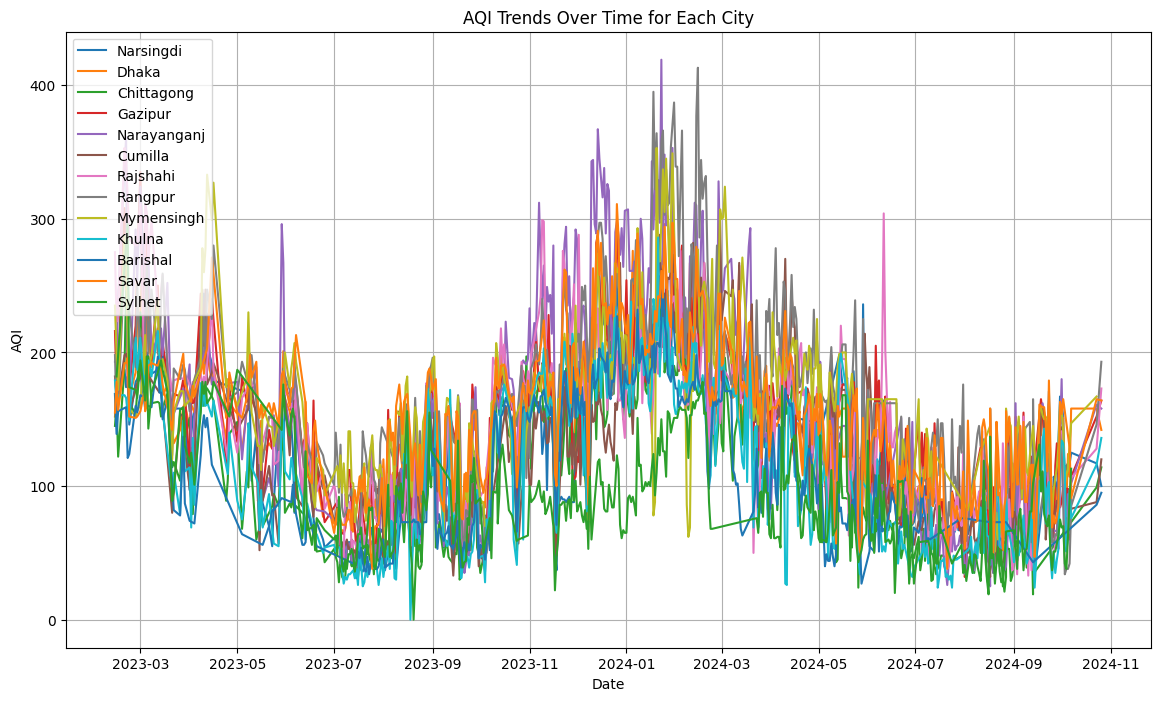

In [14]:
# Plot AQI trends for each city
plt.figure(figsize=(14, 8))
cities = df['City'].unique()

for city in cities:
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['AQI'], label=city)

plt.title('AQI Trends Over Time for Each City')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


<ipython-input-15-0c8cebdb326e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_aqi_avg.values, y=city_aqi_avg.index, palette='coolwarm')


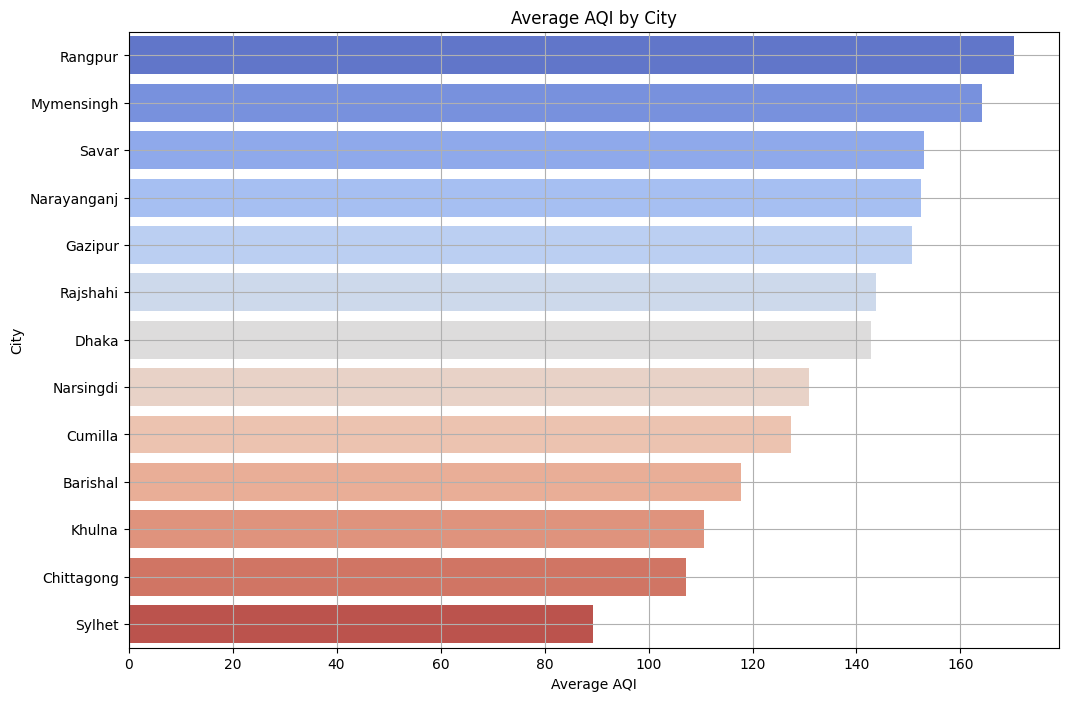

<ipython-input-15-0c8cebdb326e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=df, palette='coolwarm')


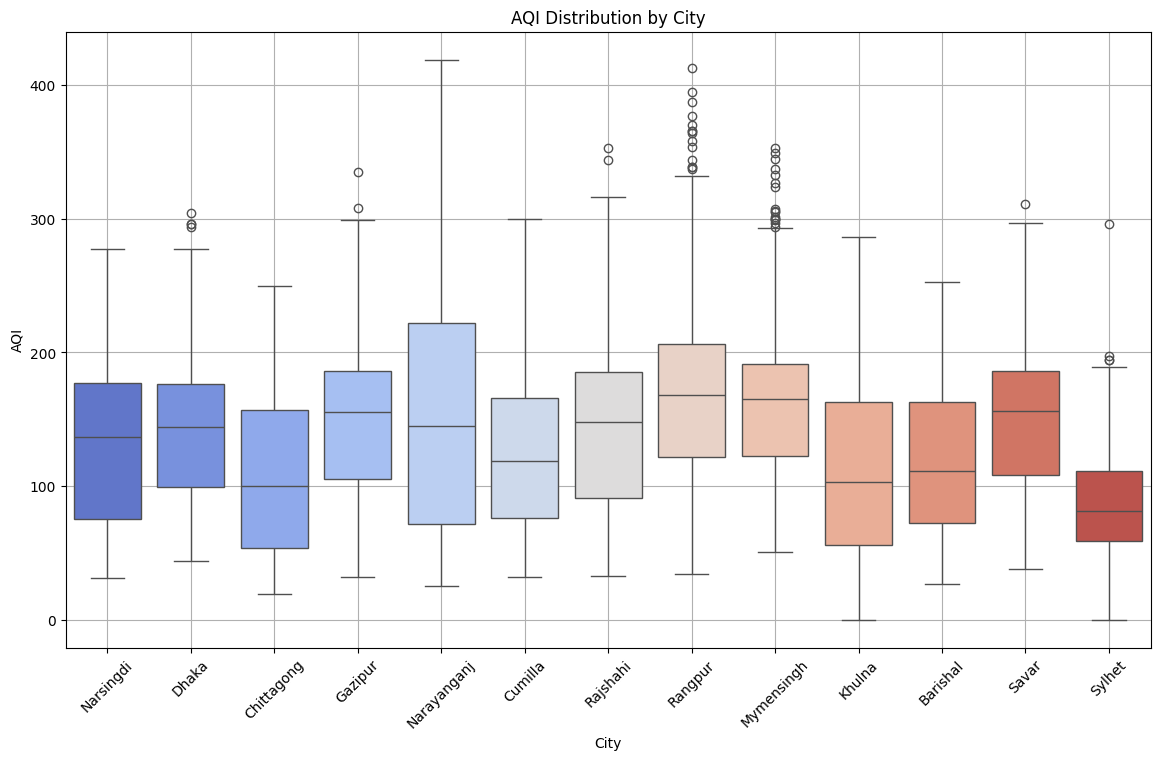

In [15]:
# Group by City to calculate average AQI per city
city_aqi_avg = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

# Plotting the average AQI for each city
plt.figure(figsize=(12, 8))
sns.barplot(x=city_aqi_avg.values, y=city_aqi_avg.index, palette='coolwarm')
plt.title('Average AQI by City')
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.grid(True)
plt.show()


# Bar Plot (Average AQI by City):
# This plot shows the average AQI for each city.
# The cities at the top of the bar chart have higher average AQI, meaning their air quality is generally worse.
# The cities at the bottom have a lower average AQI, indicating better air quality.
# What you can learn:

# Which cities have the worst air pollution.
# Which cities have relatively better air quality.
# This gives a quick overview of air pollution trends across all cities.


# Boxplot for AQI distribution by city
plt.figure(figsize=(14, 8))
sns.boxplot(x='City', y='AQI', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('AQI Distribution by City')
plt.grid(True)
plt.show()

# Box Plot (AQI Distribution by City):
# This plot shows the distribution of AQI values for each city.
# The box represents the middle 50% of the AQI values, while the lines (called "whiskers") show the range of AQI values.
# Outliers (extreme AQI values) might appear as dots outside the whiskers.
# What you can learn:

# How spread out the AQI values are for each city. A tall box or long whiskers mean AQI values fluctuate a lot.
# If a city has many outliers, it suggests that sometimes the air quality gets much worse than usual.
# You can also compare how AQI varies between cities. Cities with narrower boxes have more consistent air quality, while wider boxes indicate more variability.


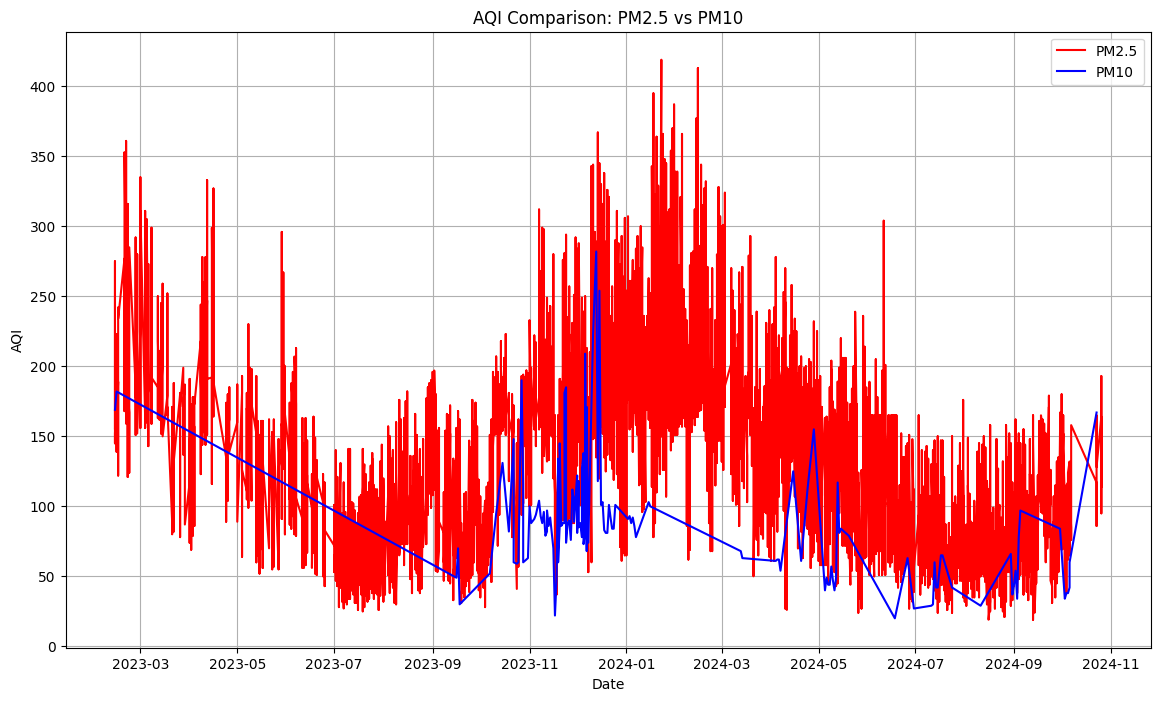

In [16]:
# Filter data by pollutant type
pm25_data = df[df['Responsible Pollutant'] == 'PM2.5']
pm10_data = df[df['Responsible Pollutant'] == 'PM10']

# Plot AQI for PM2.5 vs PM10
plt.figure(figsize=(14, 8))
plt.plot(pm25_data['Date'], pm25_data['AQI'], label='PM2.5', color='red')
plt.plot(pm10_data['Date'], pm10_data['AQI'], label='PM10', color='blue')
plt.title('AQI Comparison: PM2.5 vs PM10')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


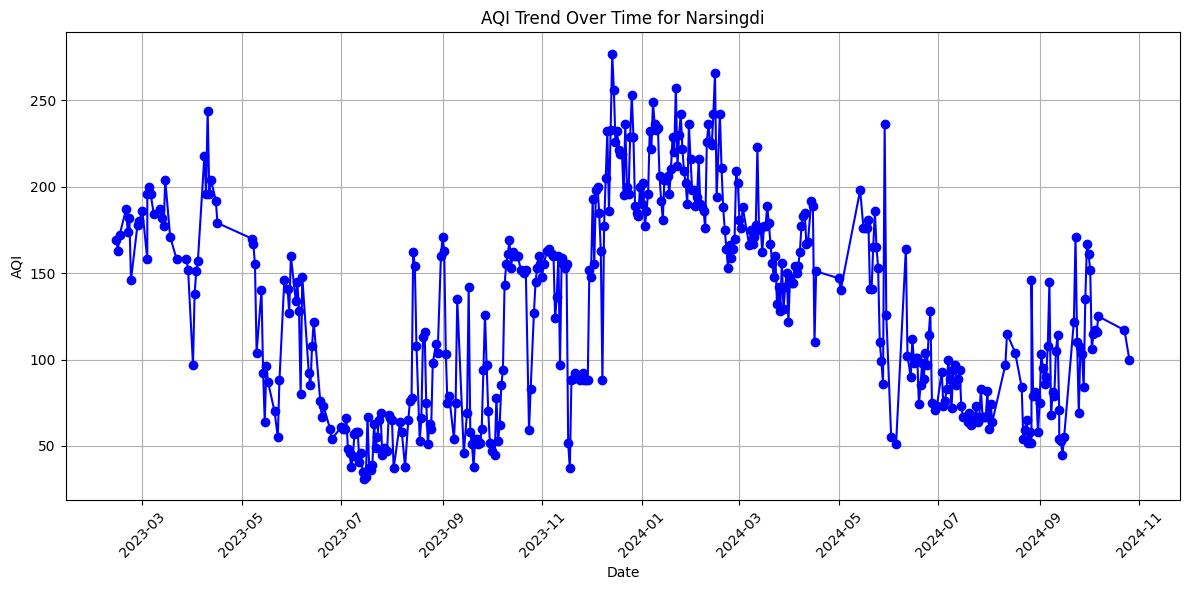

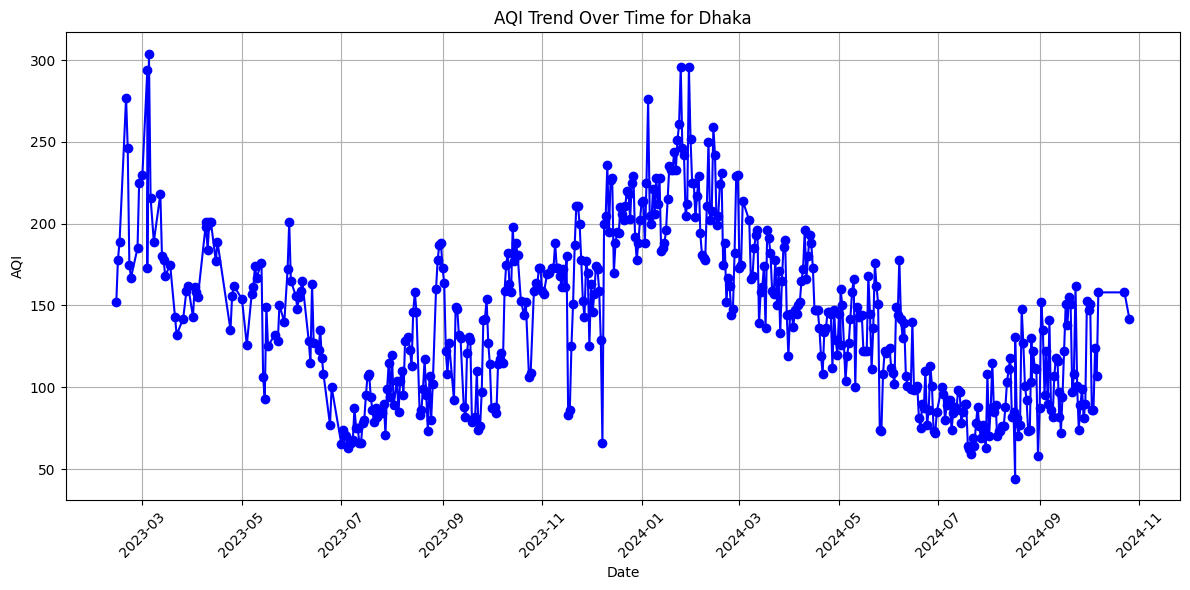

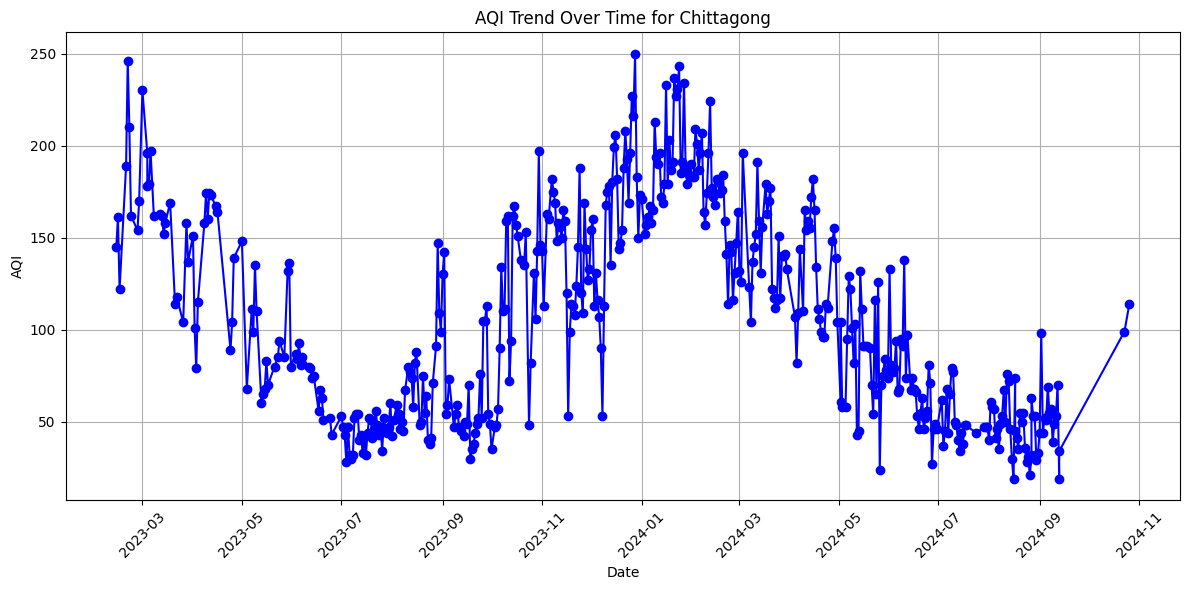

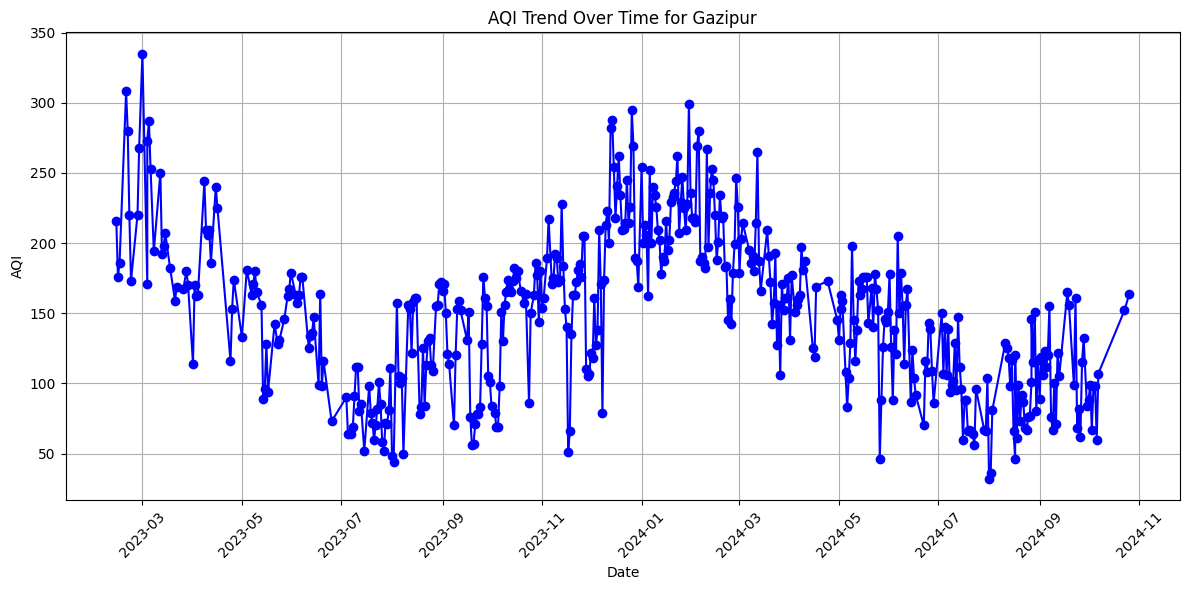

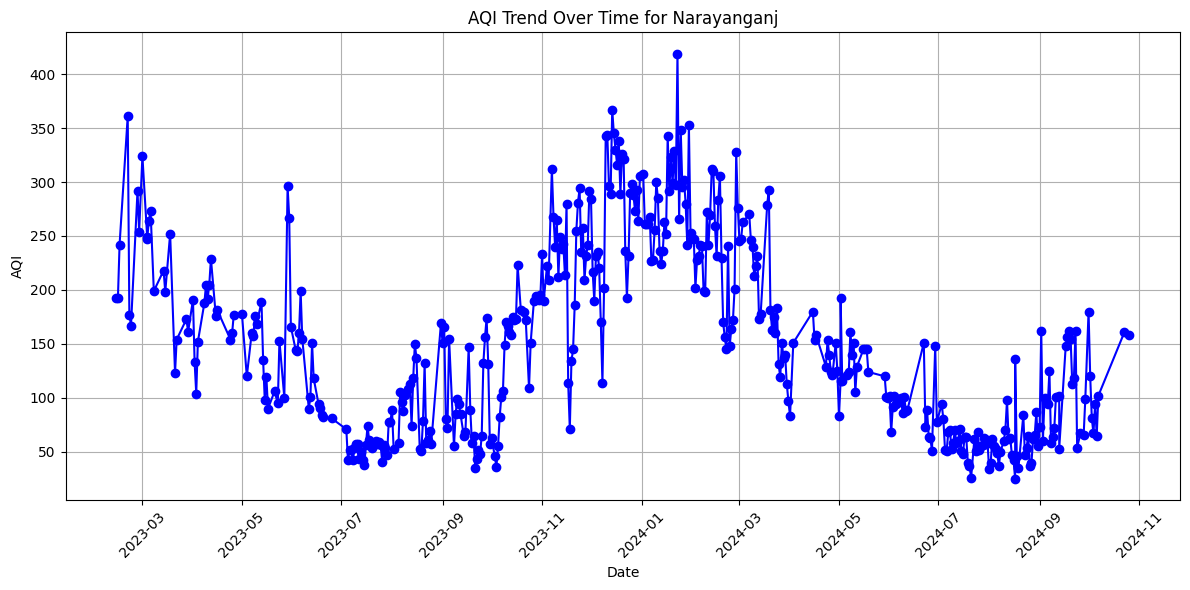

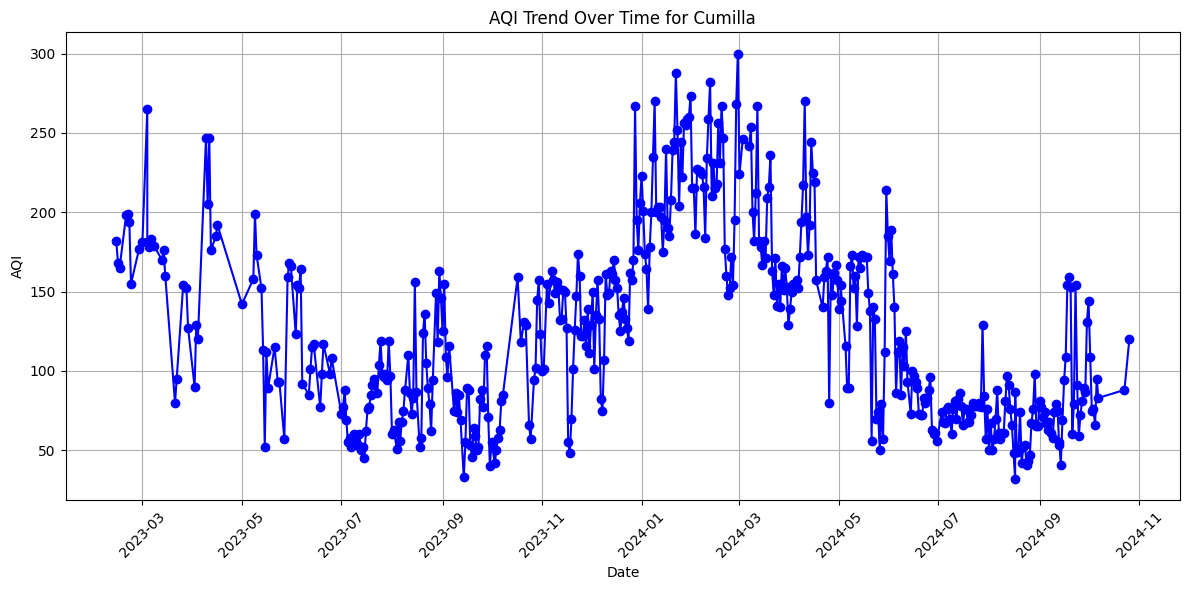

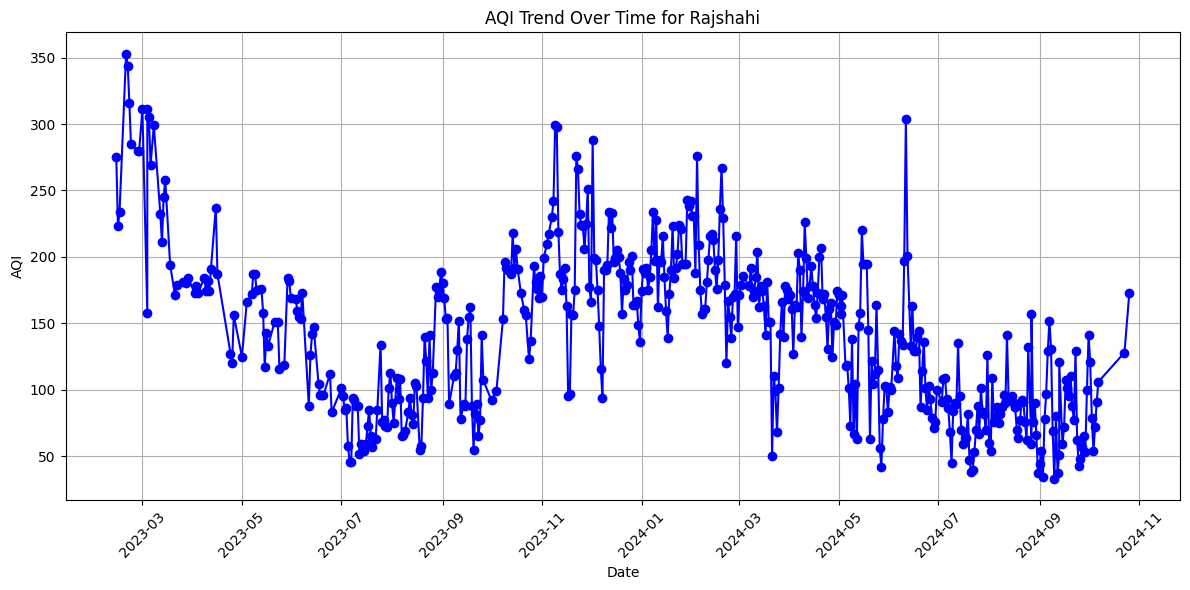

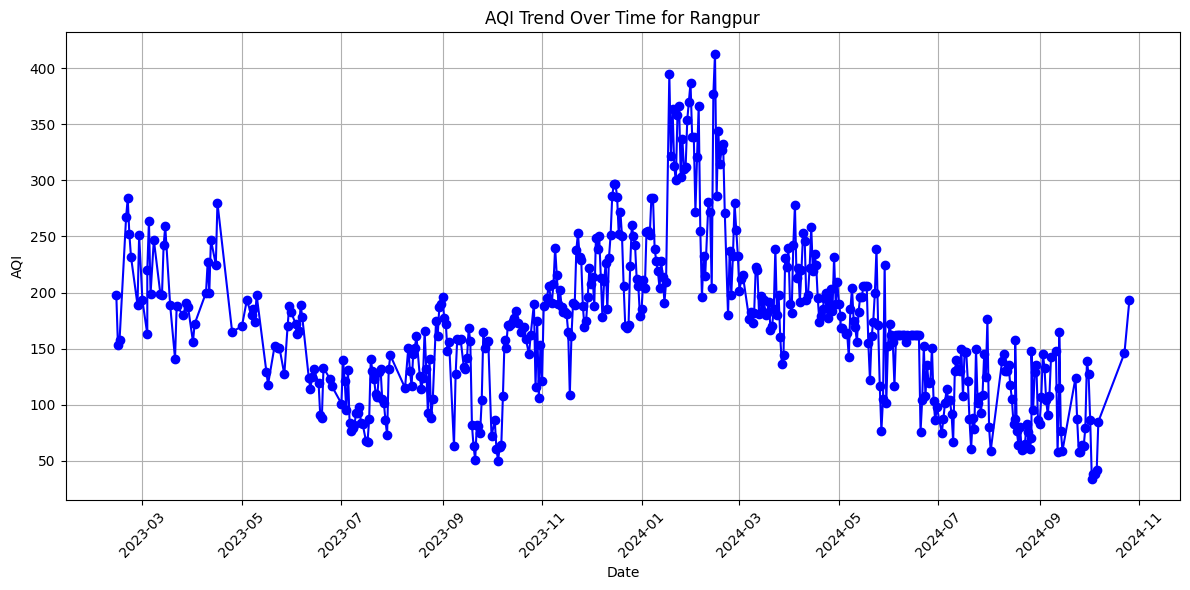

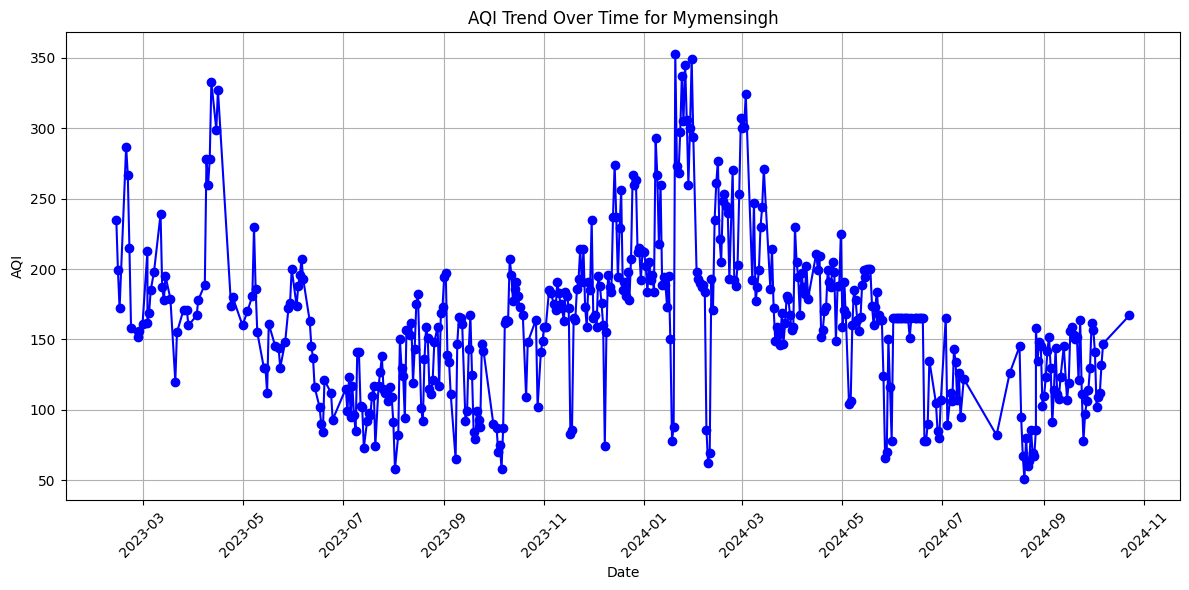

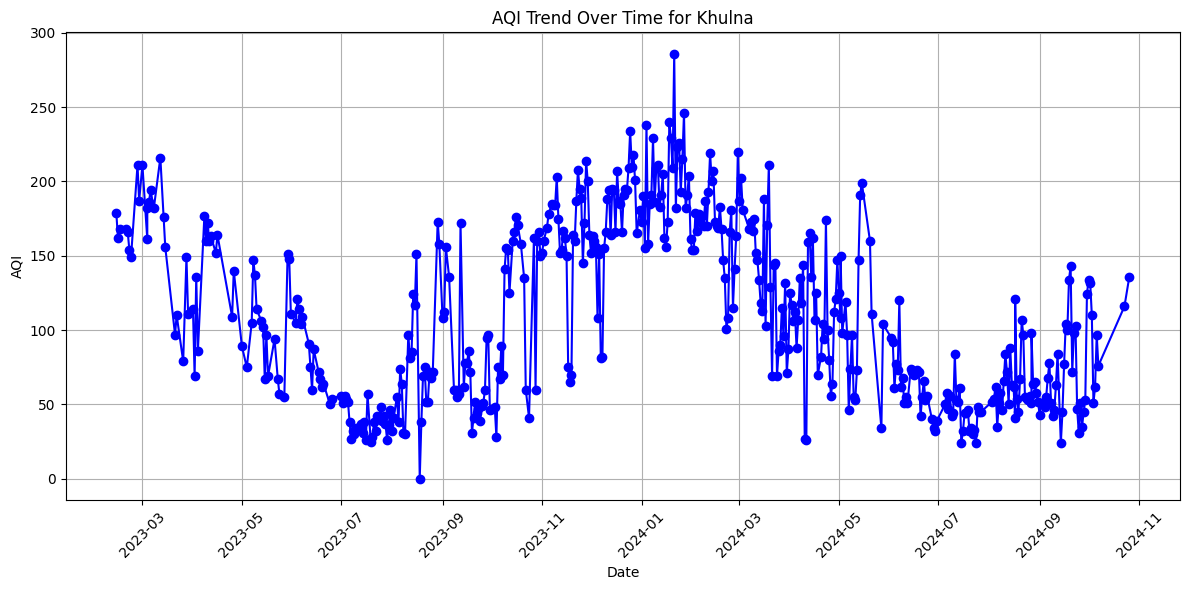

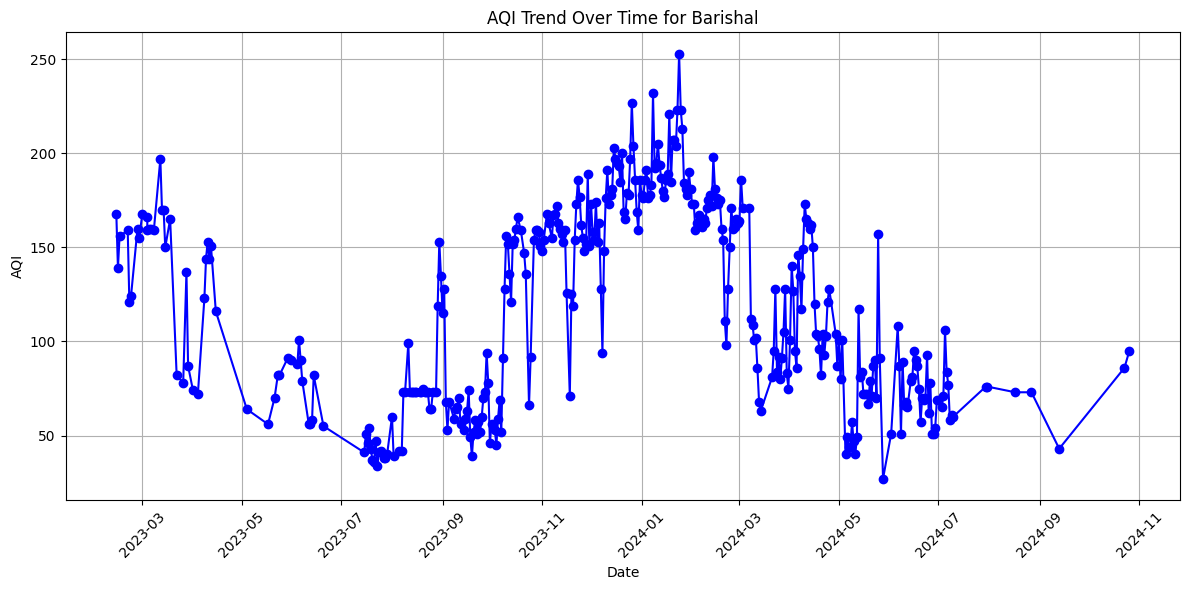

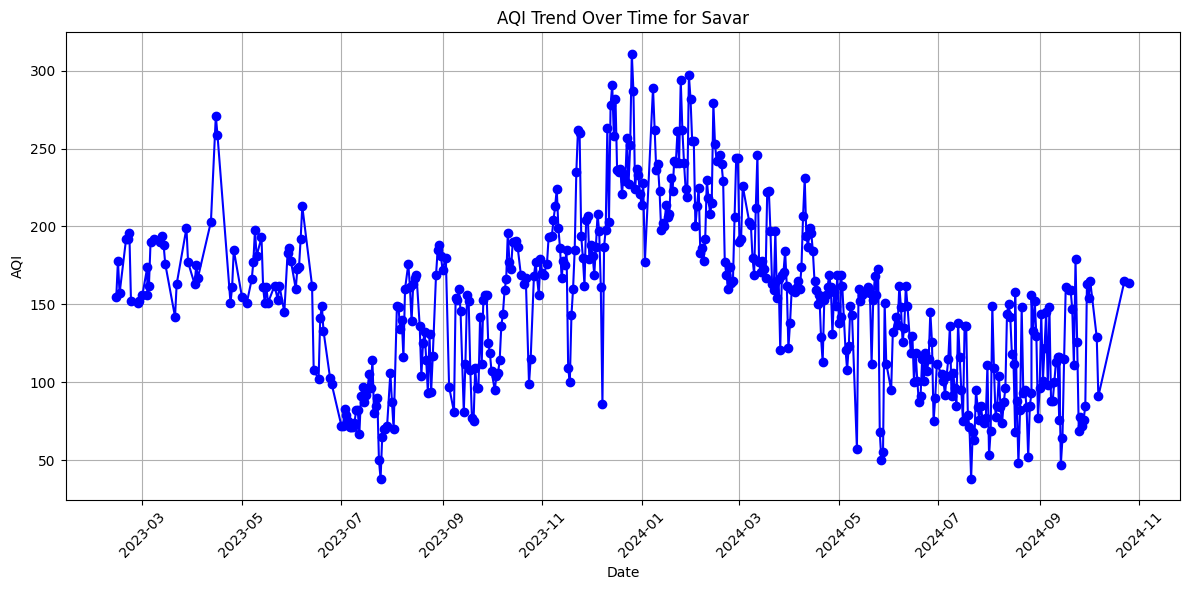

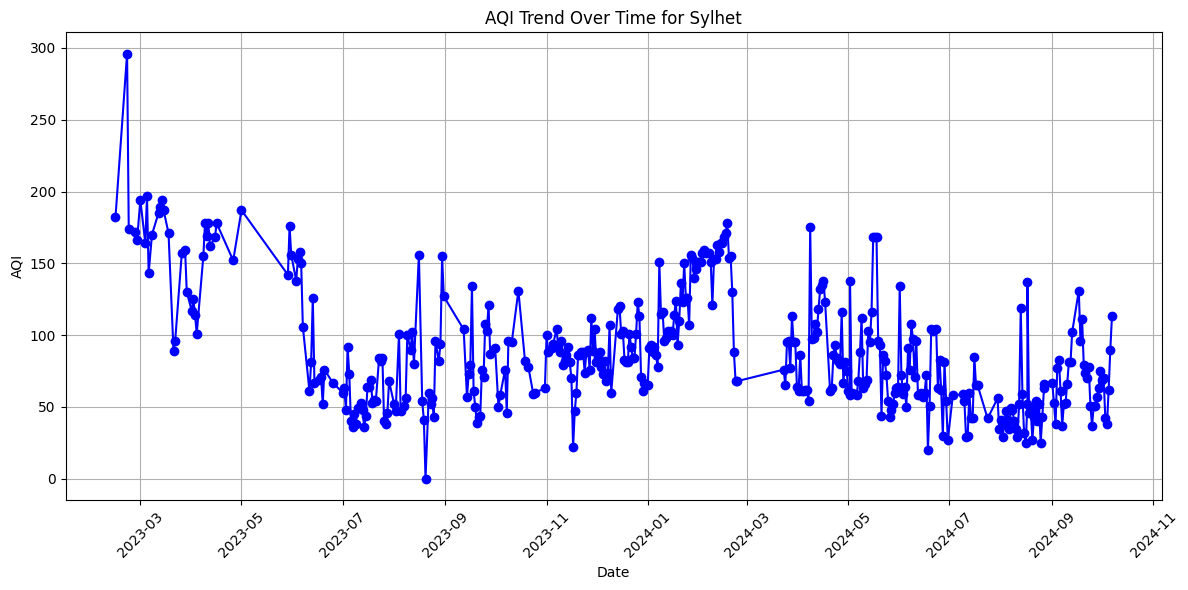

In [17]:
# Loop through each city and create individual plots for AQI trends
cities = df['City'].unique()

for city in cities:
    plt.figure(figsize=(12, 6))
    city_data = df[df['City'] == city]

    plt.plot(city_data['Date'], city_data['AQI'], label=city, color='b', marker='o')
    plt.title(f'AQI Trend Over Time for {city}')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.grid(True)

    #Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


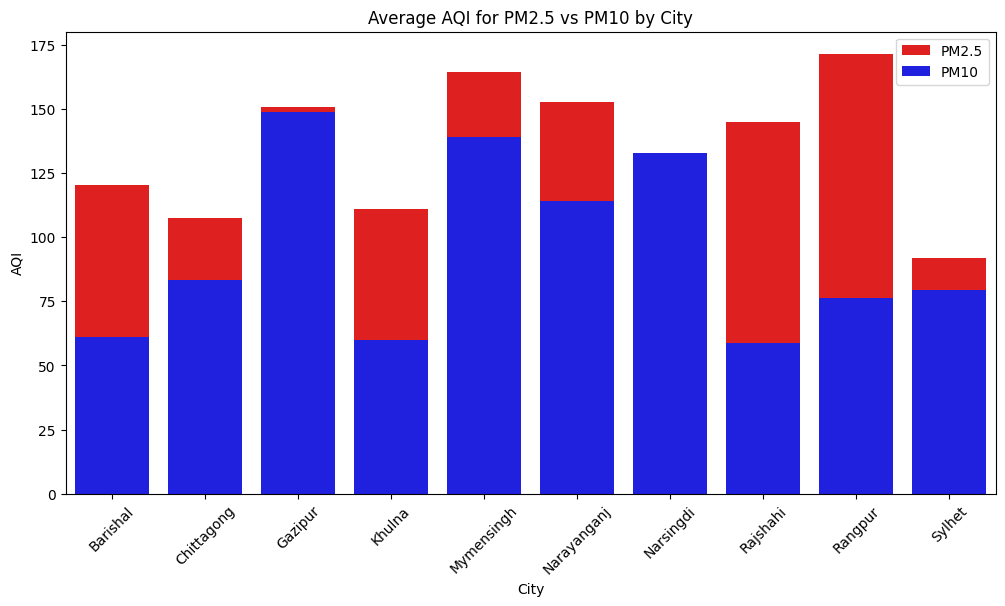

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for PM2.5 and PM10
pm25_data = df[df['Responsible Pollutant'] == 'PM2.5']
pm10_data = df[df['Responsible Pollutant'] == 'PM10']

# Group data by city and calculate the mean AQI for PM2.5 and PM10
pm25_avg = pm25_data.groupby('City')['AQI'].mean().reset_index()
pm10_avg = pm10_data.groupby('City')['AQI'].mean().reset_index()

# Merge both datasets for comparison
city_avg = pd.merge(pm25_avg, pm10_avg, on='City', suffixes=('_PM2.5', '_PM10'))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='AQI_PM2.5', data=city_avg, color='red', label='PM2.5')
sns.barplot(x='City', y='AQI_PM10', data=city_avg, color='blue', label='PM10')

plt.title('Average AQI for PM2.5 vs PM10 by City')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.show()


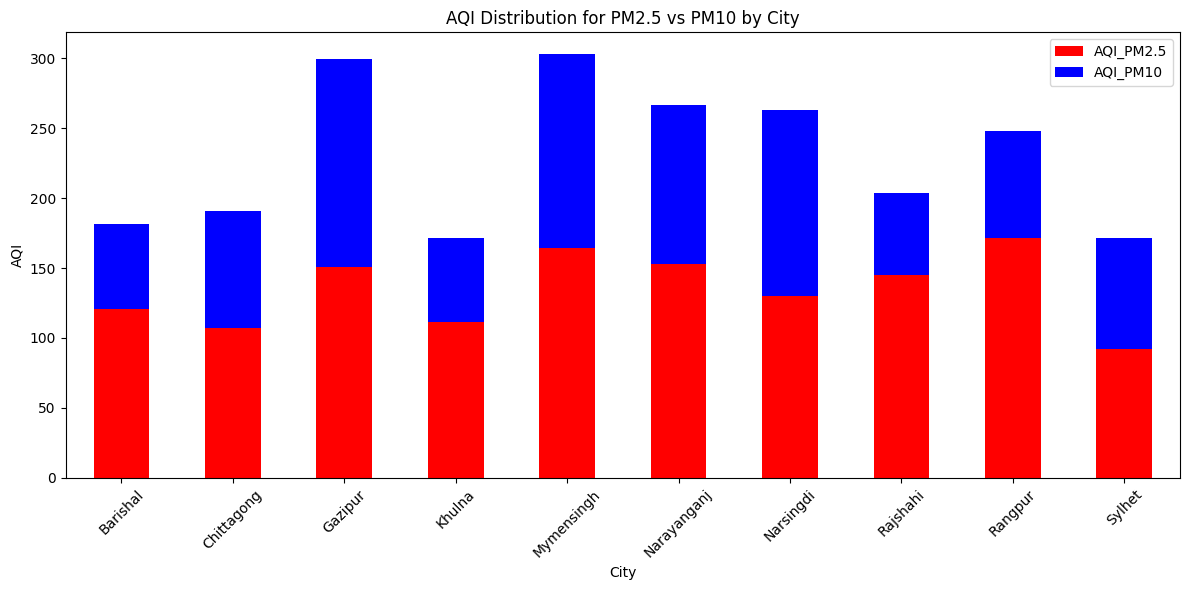

In [19]:
# Plot stacked bar plot for AQI from PM2.5 and PM10 per city
city_avg.set_index('City')[['AQI_PM2.5', 'AQI_PM10']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'blue'])

plt.title('AQI Distribution for PM2.5 vs PM10 by City')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


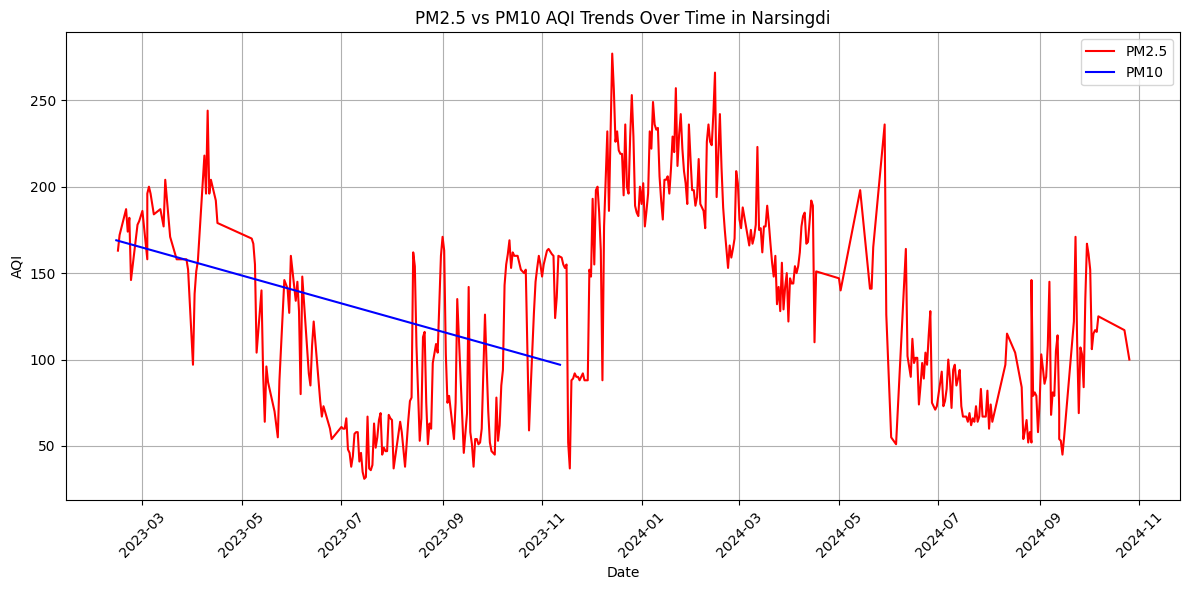

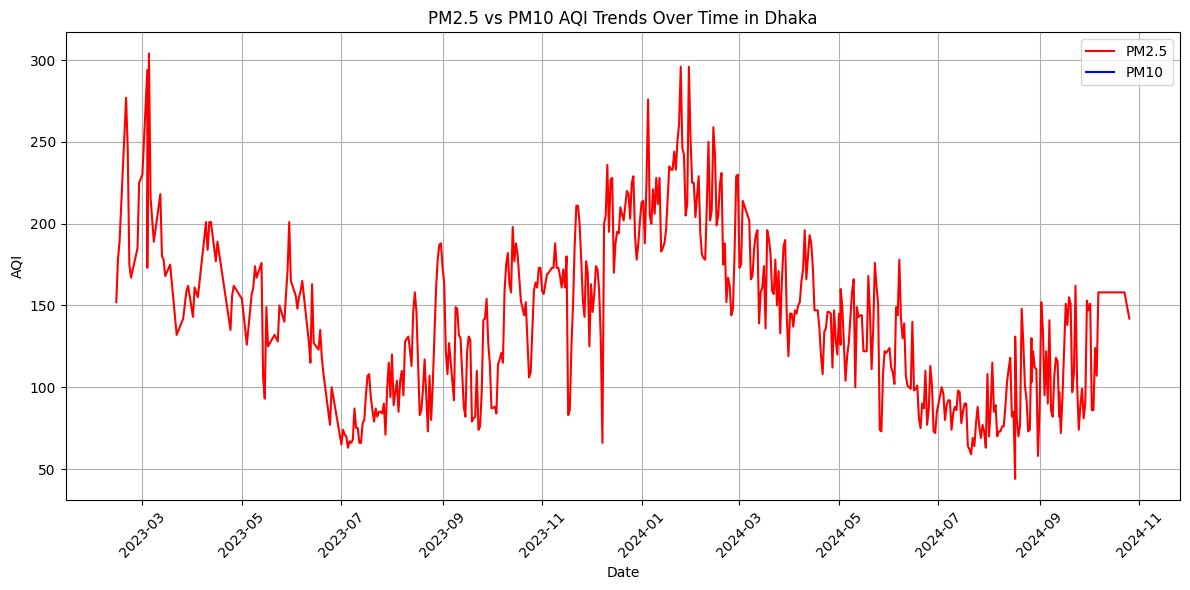

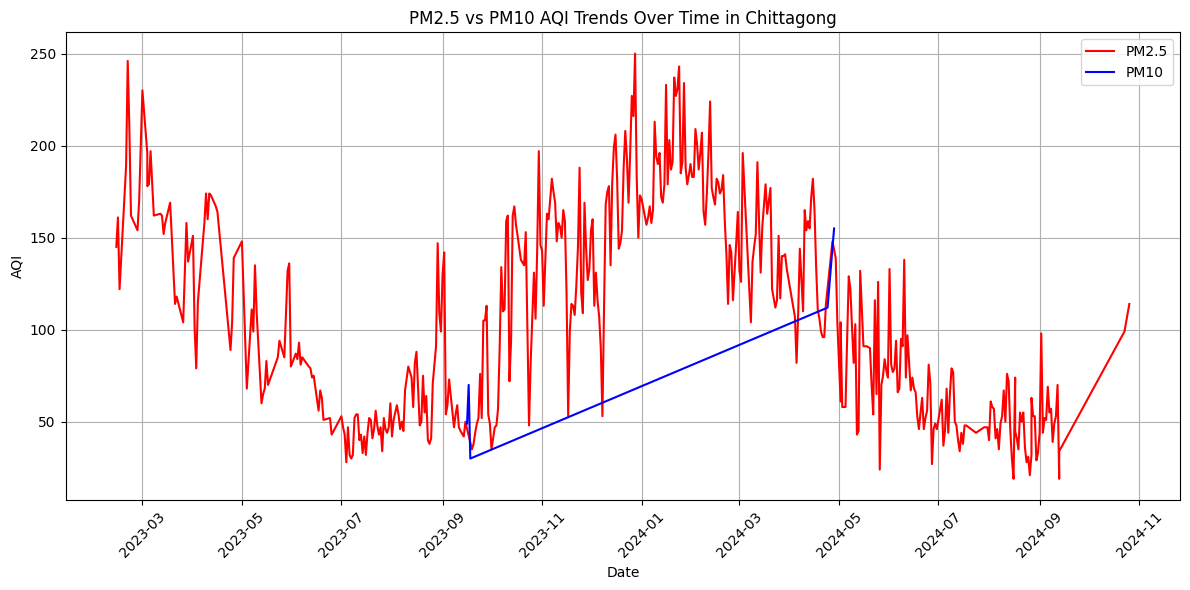

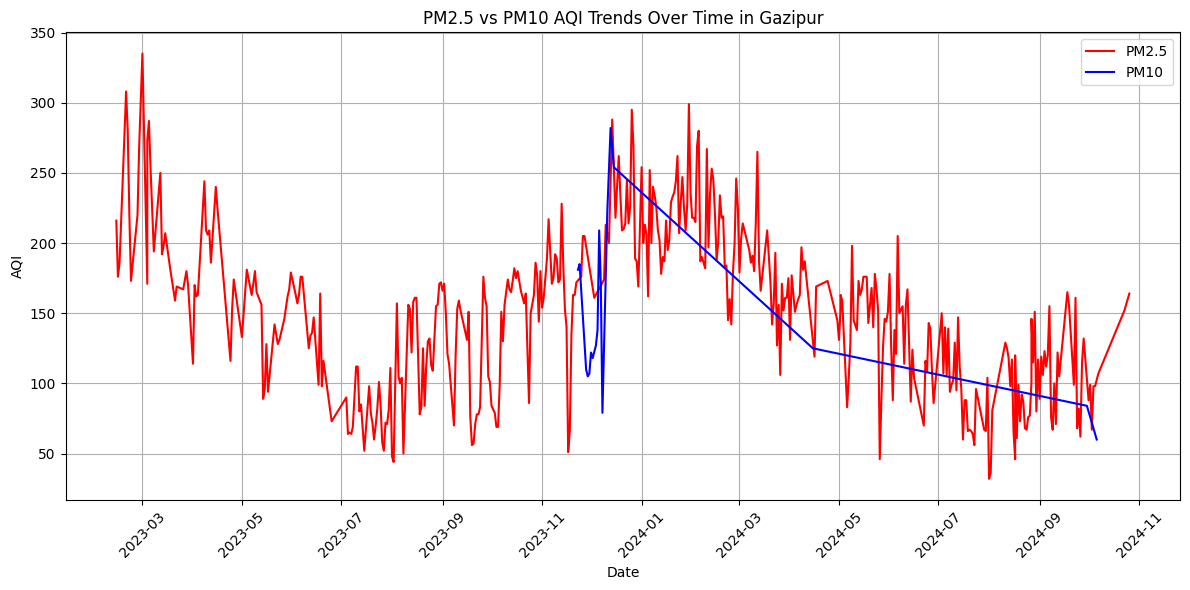

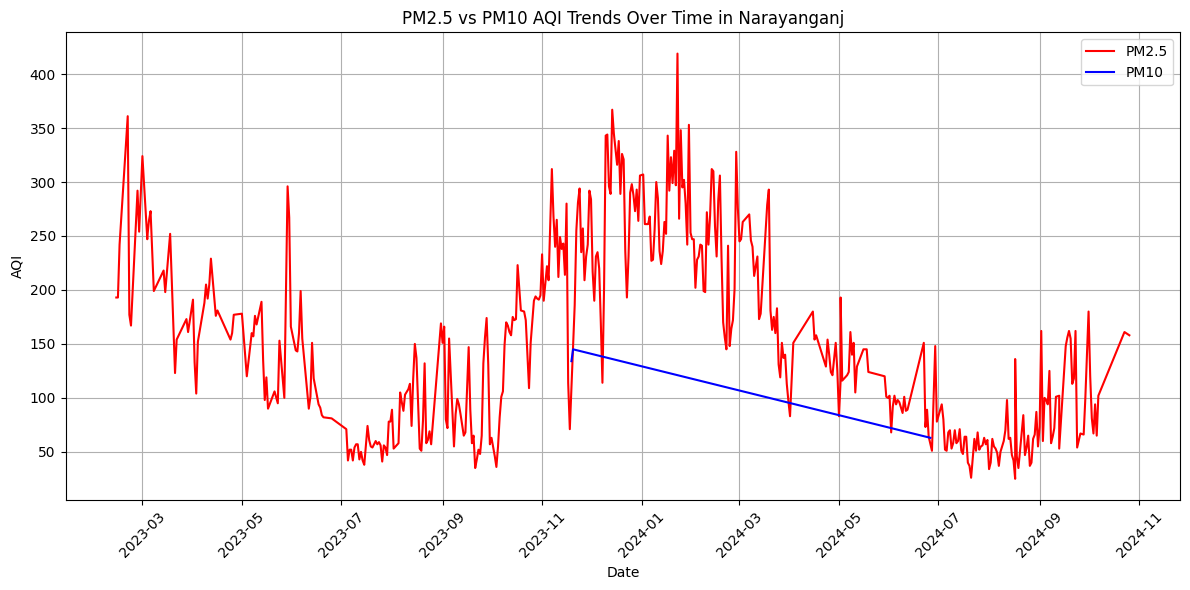

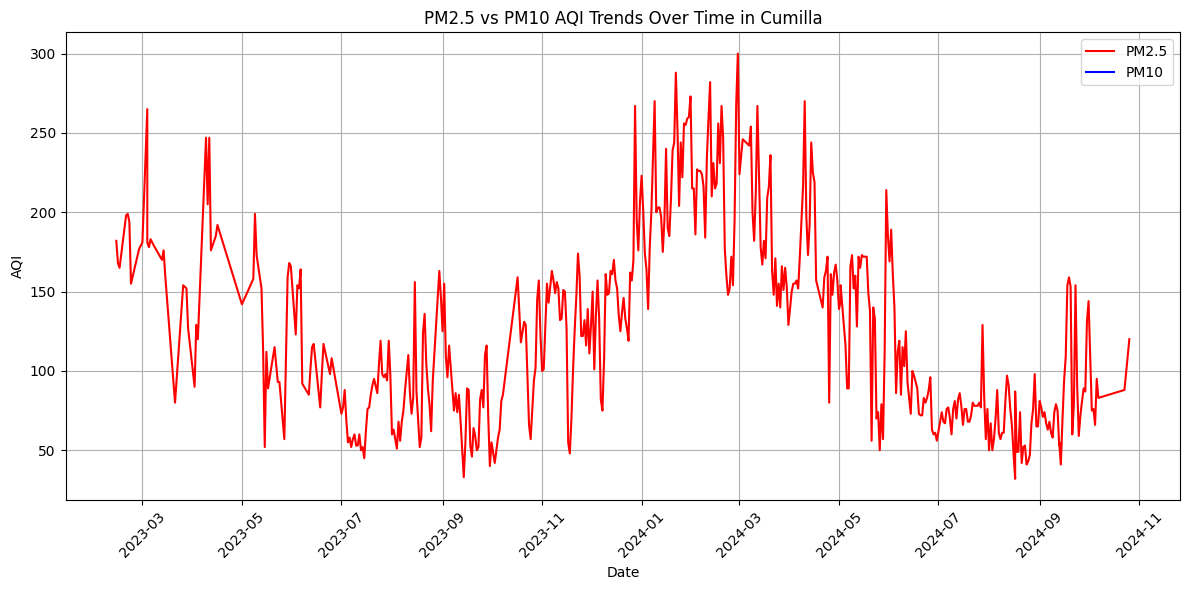

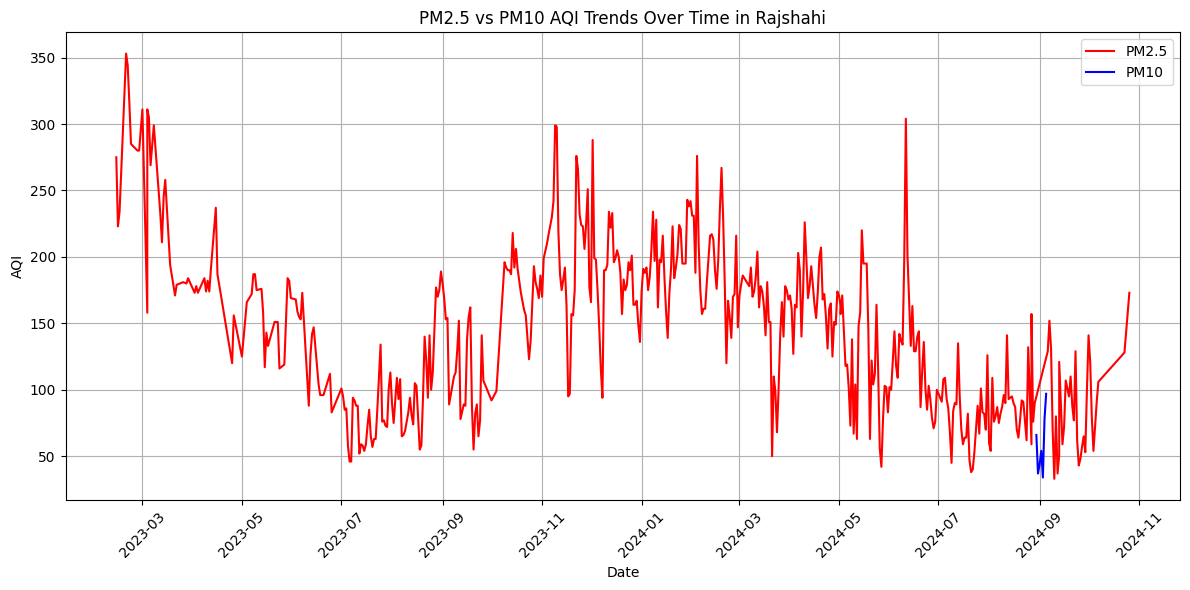

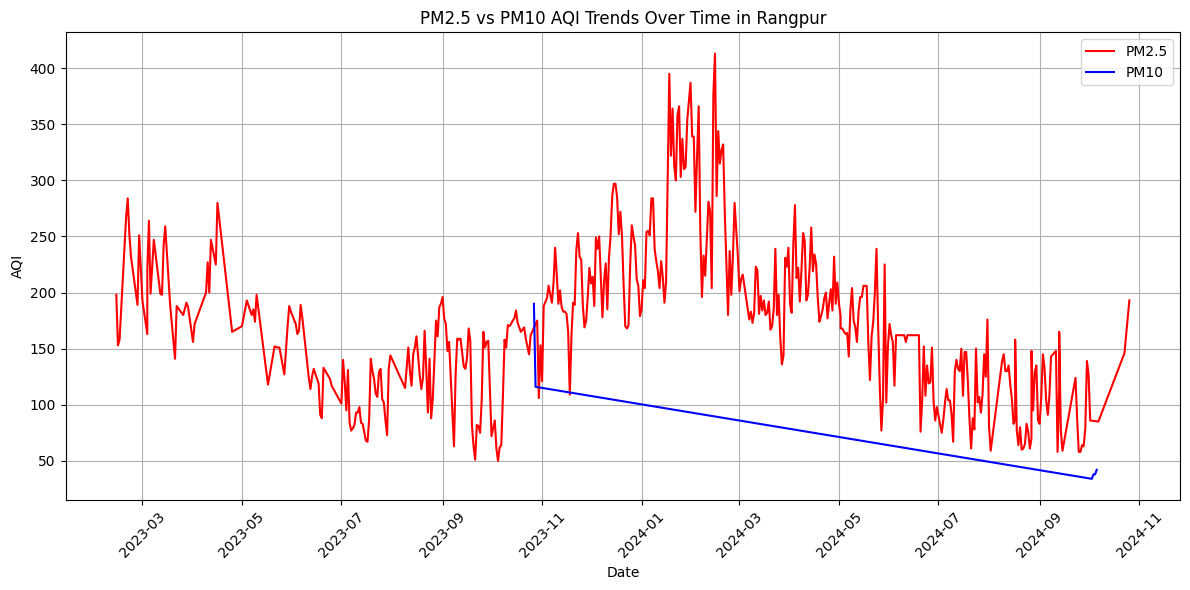

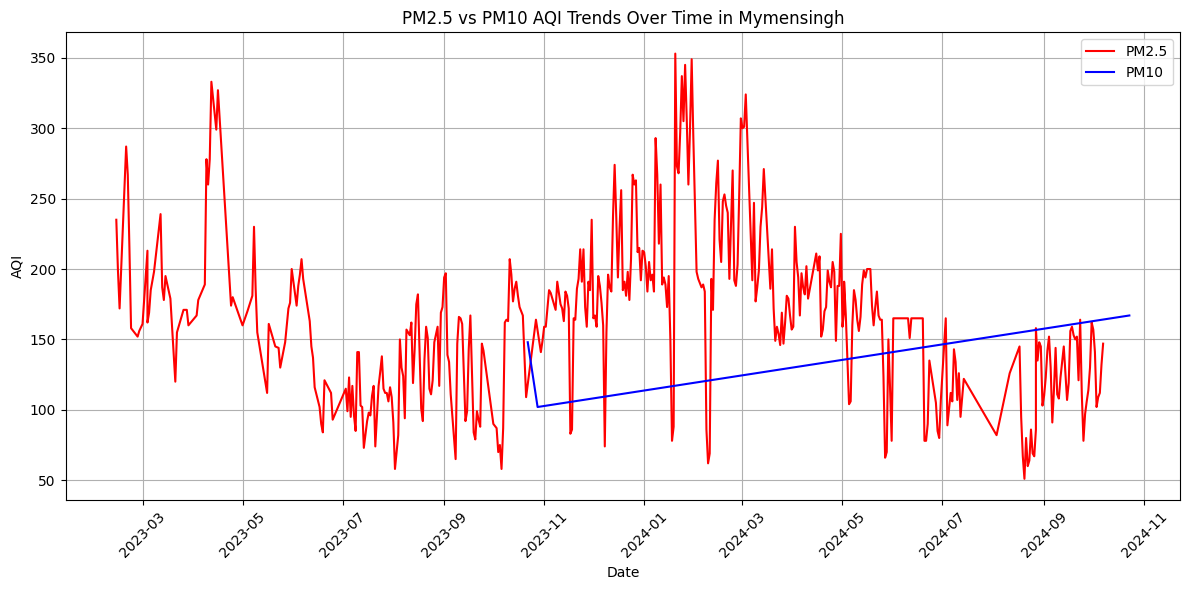

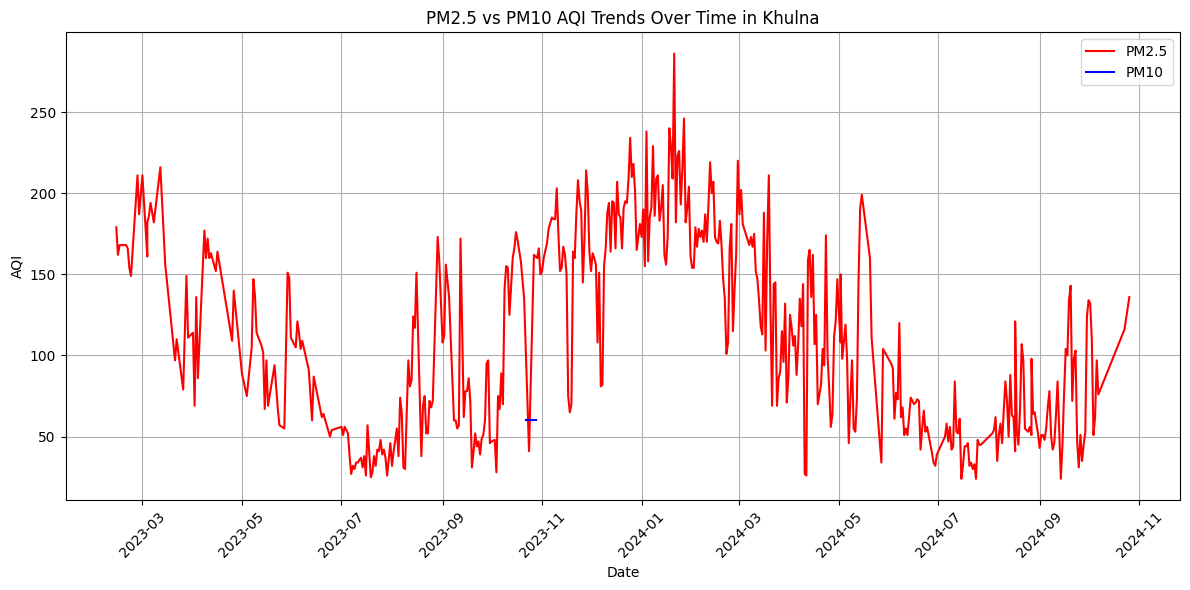

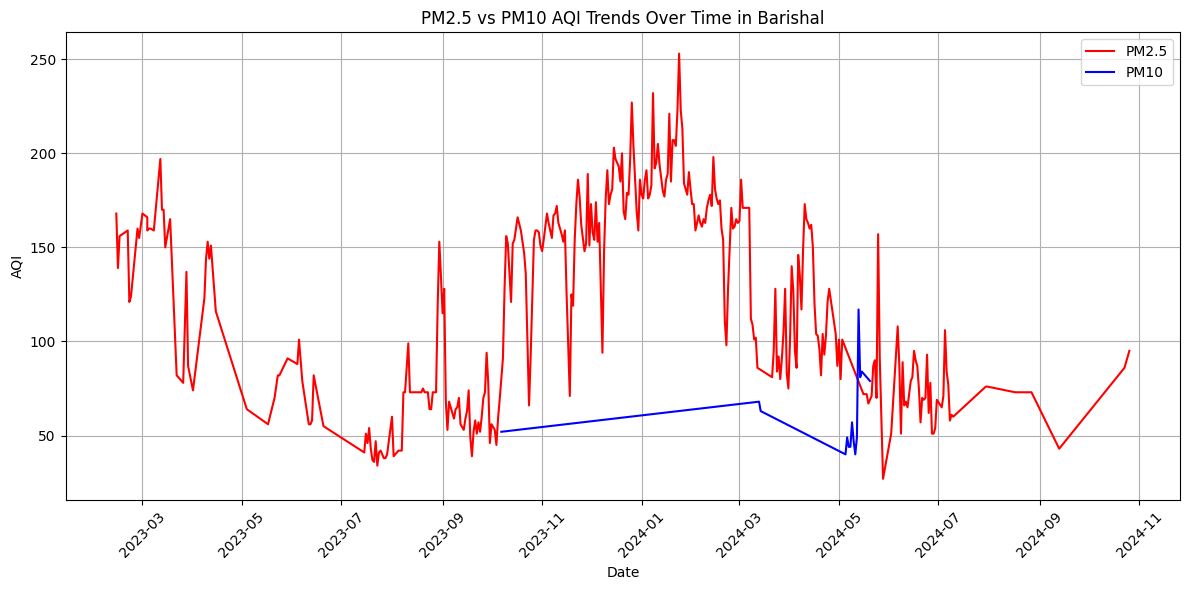

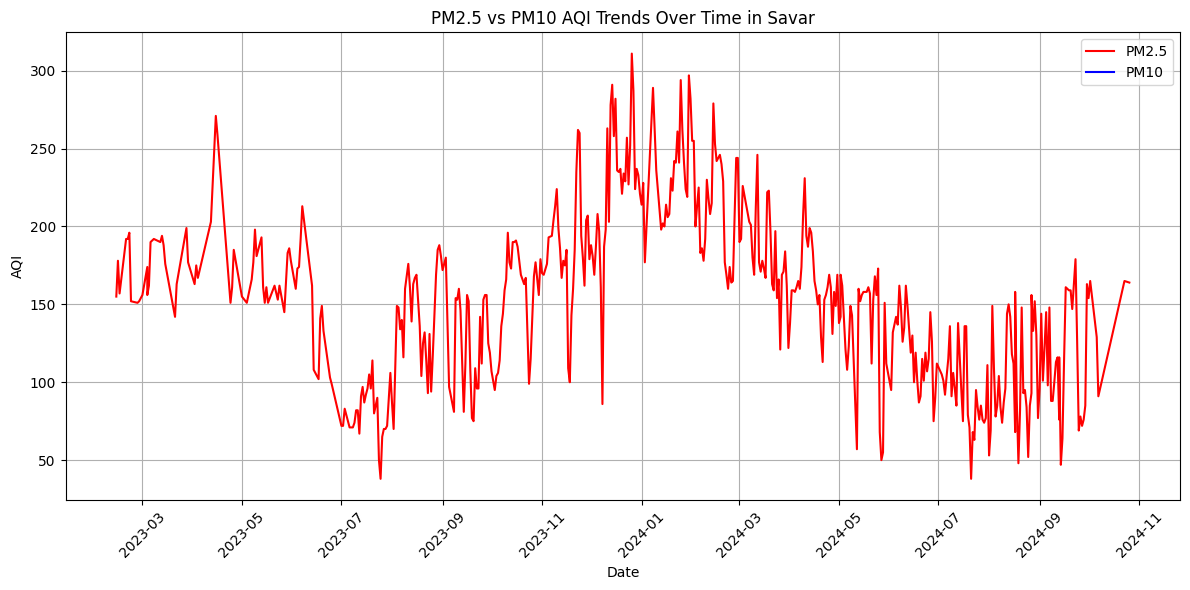

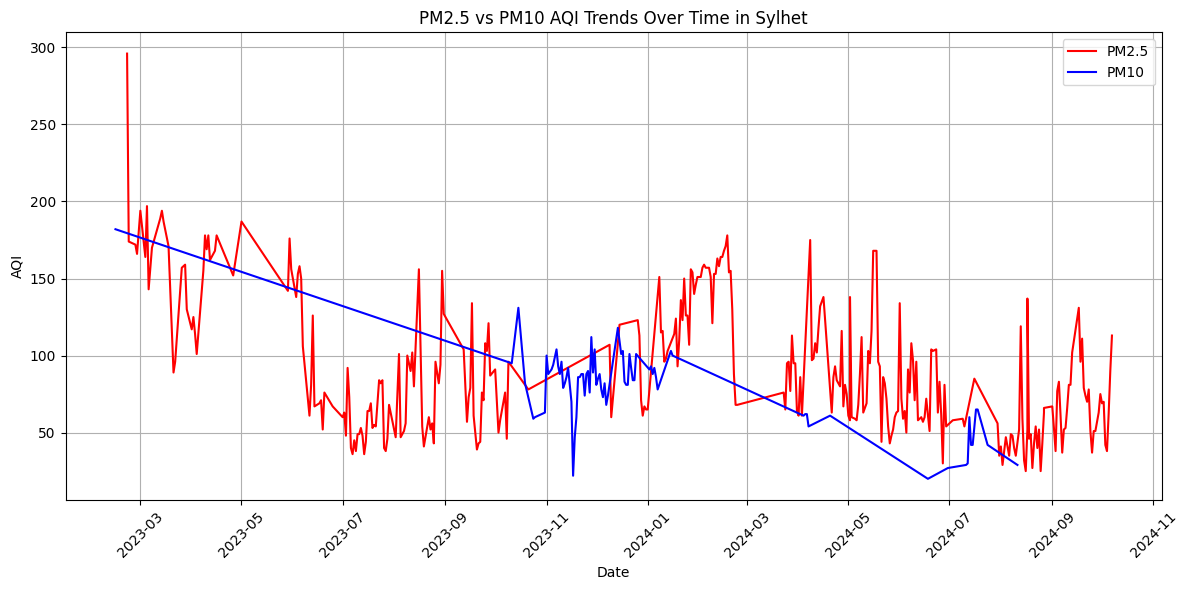

In [20]:
cities = df['City'].unique()

for city in cities:
    plt.figure(figsize=(12, 6))
    city_pm25_data = pm25_data[pm25_data['City'] == city]
    city_pm10_data = pm10_data[pm10_data['City'] == city]

    plt.plot(city_pm25_data['Date'], city_pm25_data['AQI'], label='PM2.5', color='red')
    plt.plot(city_pm10_data['Date'], city_pm10_data['AQI'], label='PM10', color='blue')

    plt.title(f'PM2.5 vs PM10 AQI Trends Over Time in {city}')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [21]:
!pip install statsmodels pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.6 MB/s eta 0:00:00



Processing: Narsingdi


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

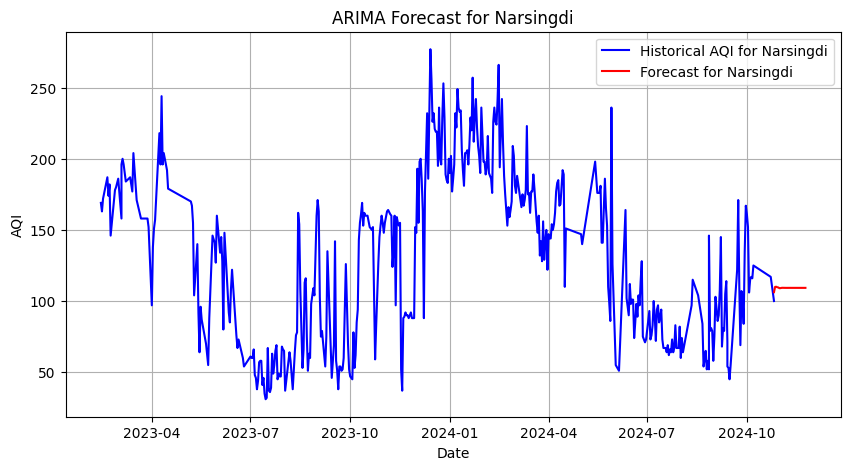


Processing: Dhaka


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

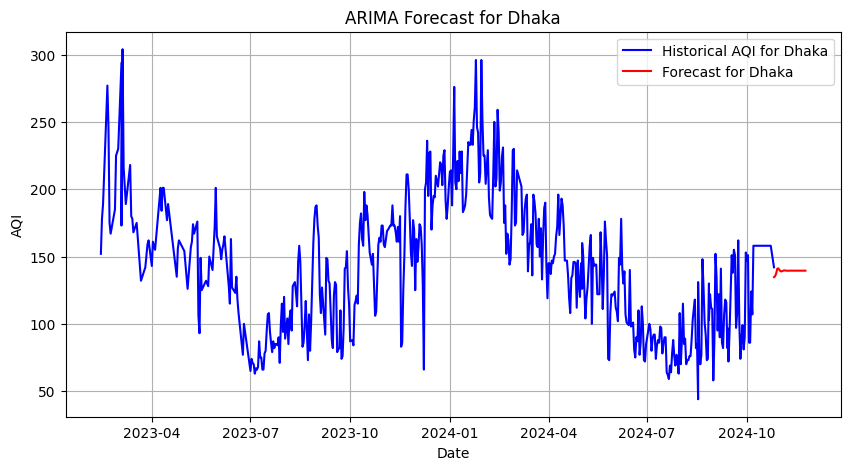


Processing: Chittagong


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

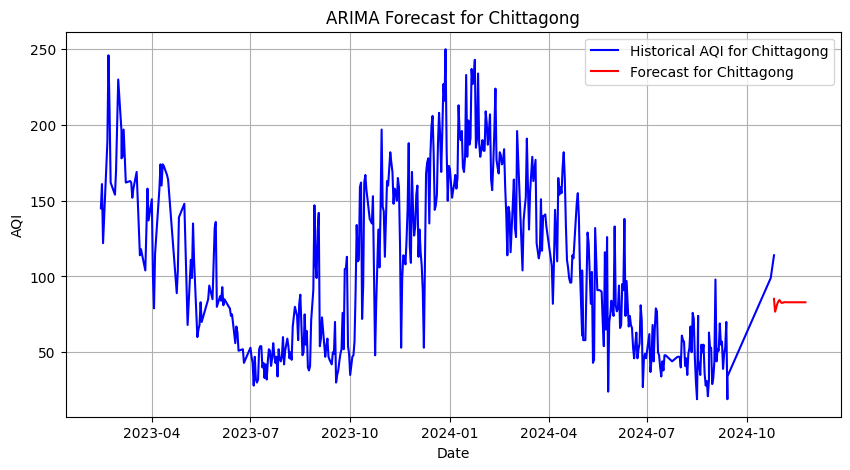


Processing: Gazipur


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

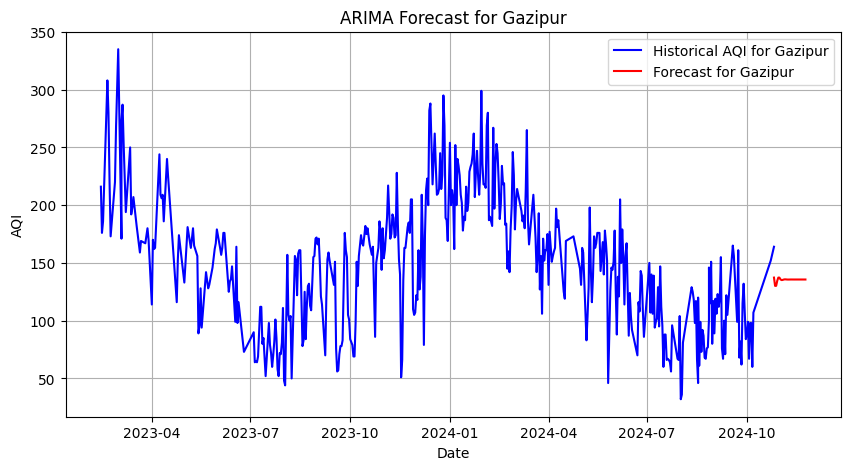


Processing: Narayanganj


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

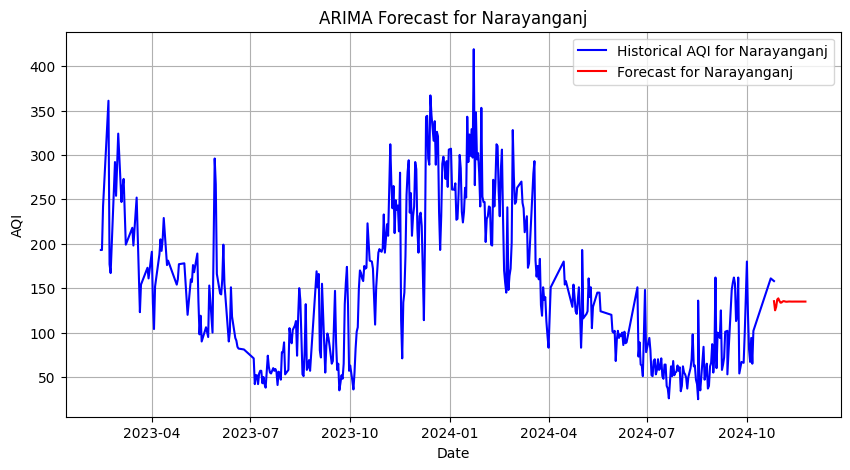


Processing: Cumilla


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

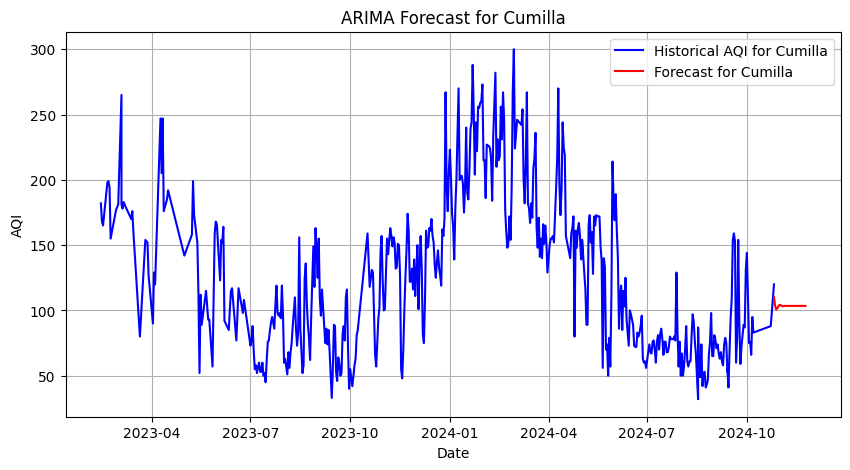


Processing: Rajshahi


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

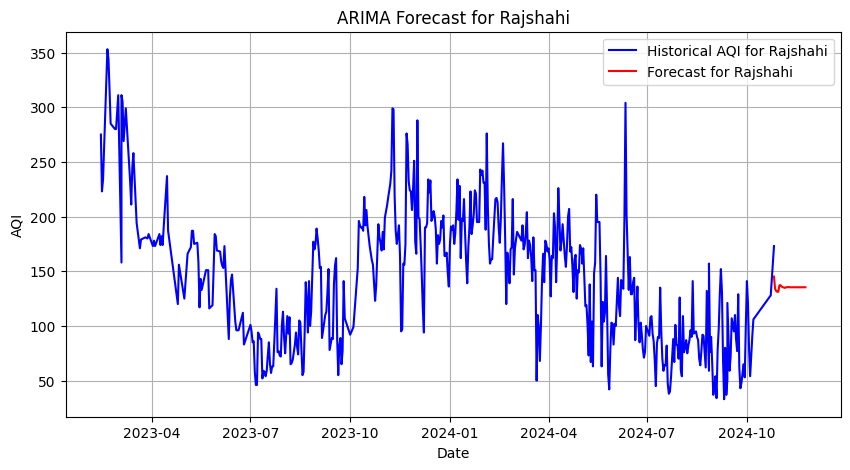


Processing: Rangpur


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

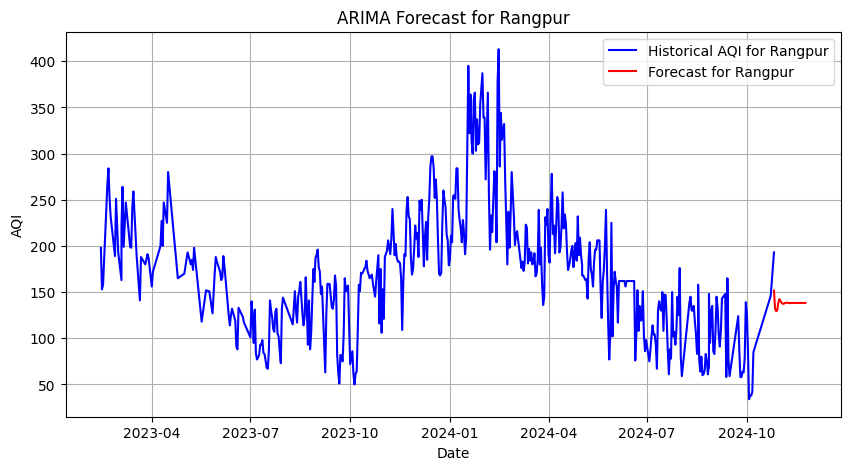


Processing: Mymensingh


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

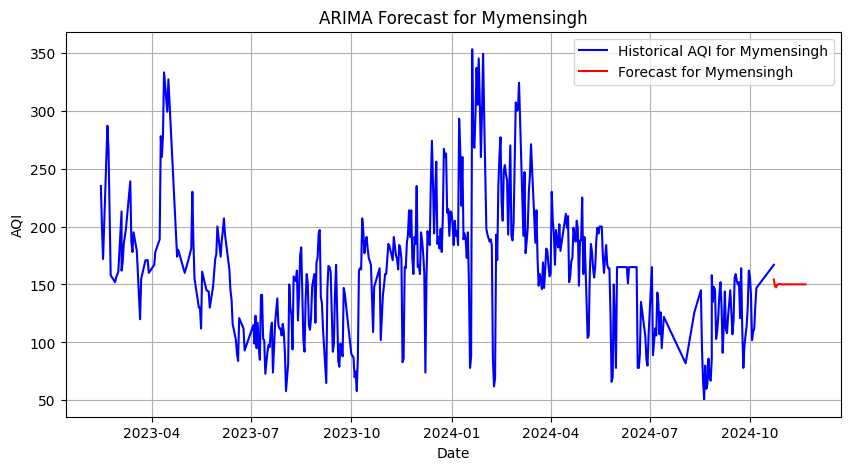


Processing: Khulna


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

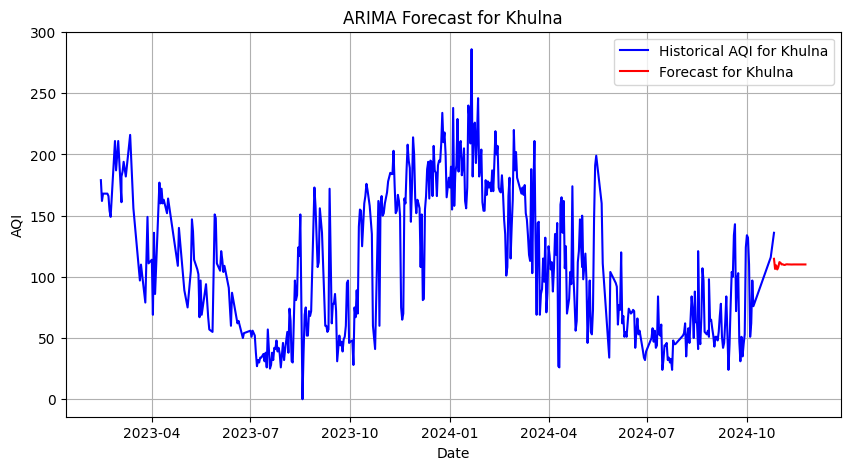


Processing: Barishal


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

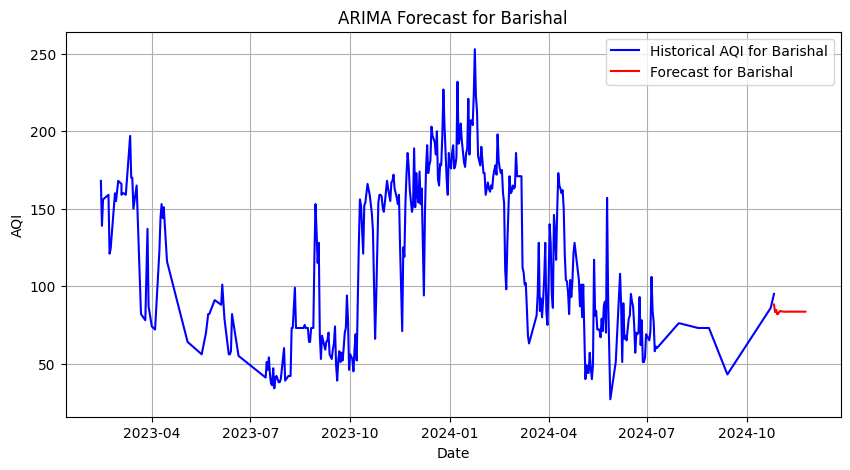


Processing: Savar


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

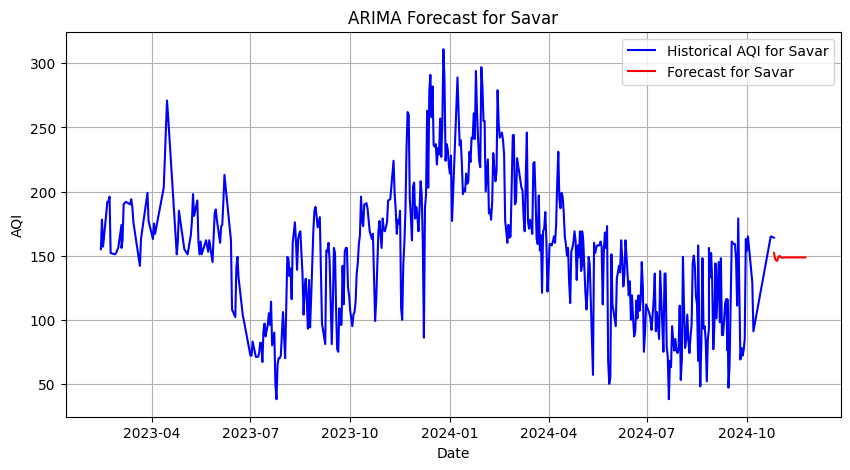


Processing: Sylhet


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

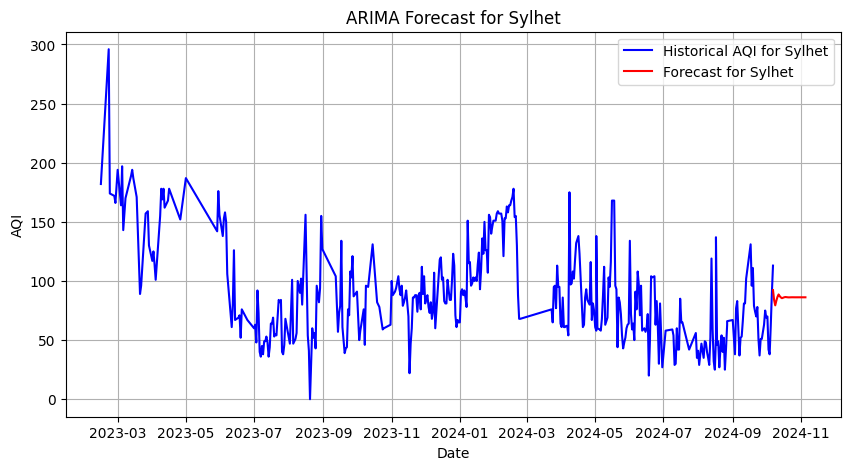


Processing: PM10


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

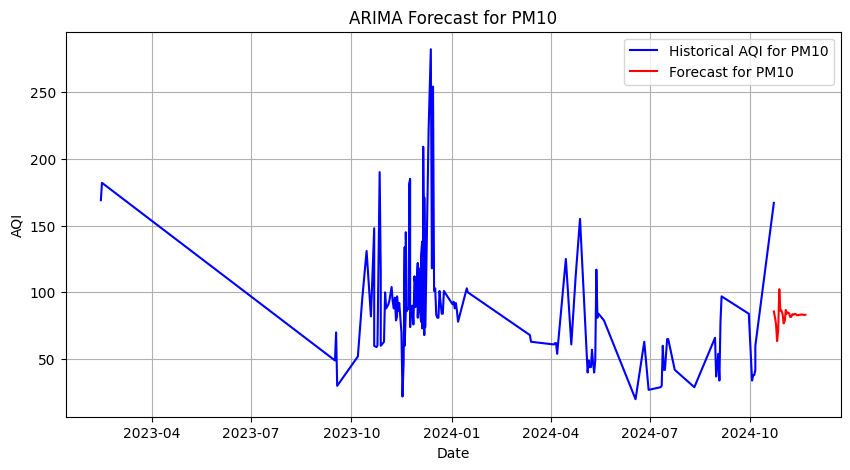


Processing: PM2.5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

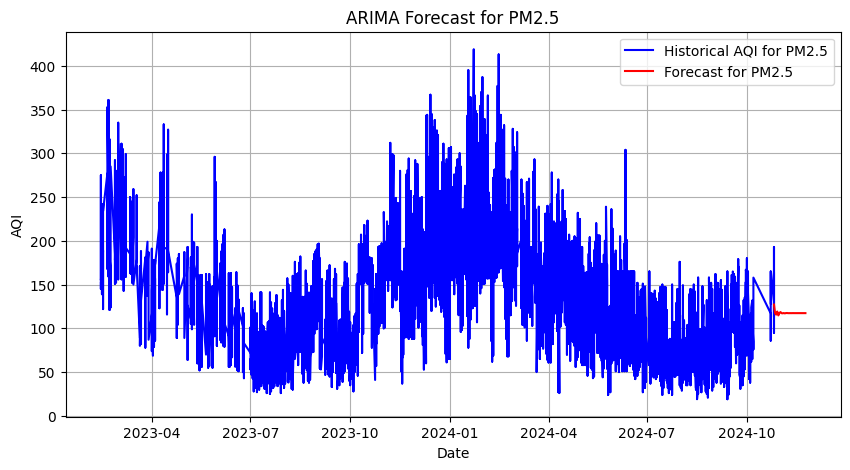


Processing: DNA


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

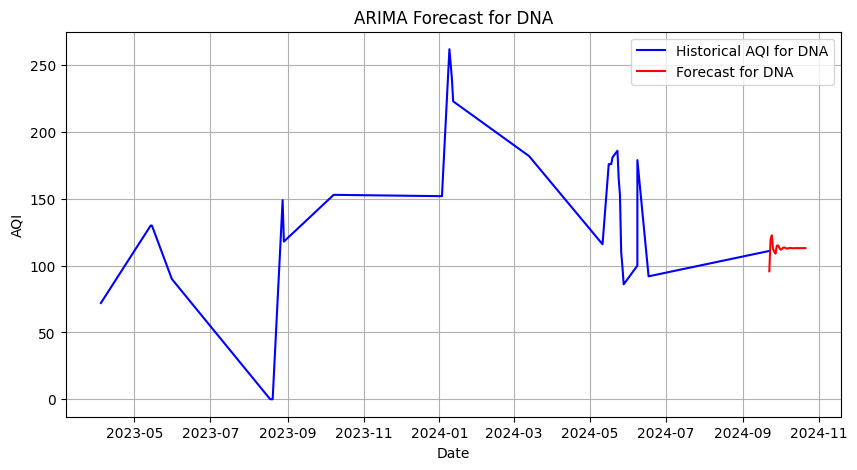

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to apply ARIMA and plot forecast for each group (city or pollutant)
def apply_arima_and_forecast(df, group_by_column, forecast_steps=30):
    unique_groups = df[group_by_column].unique()

    # Loop through each city or pollutant
    for group in unique_groups:
        print(f"\nProcessing: {group}")

        # Filter data for the current group (city or pollutant)
        df_group = df[df[group_by_column] == group].copy()

        # Set 'Date' as the index and sort it
        df_group.set_index('Date', inplace=True)
        df_group = df_group.sort_index()

        # Ensure AQI column is numeric (if not already)
        df_group['AQI'] = pd.to_numeric(df_group['AQI'], errors='coerce')

        # Drop rows with missing AQI values
        df_group = df_group.dropna(subset=['AQI'])

        # Check if the group has enough data points for ARIMA modeling
        if len(df_group) < 10:
            print(f"Skipping {group} due to insufficient data")
            continue

        # Apply ARIMA model (use a simple (5, 1, 0) order, can be tuned)
        model = ARIMA(df_group['AQI'], order=(5, 1, 0))
        model_fit = model.fit()

        # Forecast the next 'forecast_steps' days
        forecast = model_fit.forecast(steps=forecast_steps)

        # Plot the historical AQI and the forecasted AQI
        plt.figure(figsize=(10, 5))
        plt.plot(df_group.index, df_group['AQI'], label=f'Historical AQI for {group}', color='blue')
        plt.plot(pd.date_range(df_group.index[-1], periods=forecast_steps, freq='D'), forecast, label=f'Forecast for {group}', color='red')
        plt.title(f'ARIMA Forecast for {group}')
        plt.xlabel('Date')
        plt.ylabel('AQI')
        plt.legend()
        plt.grid(True)
        plt.show()

# Forecast AQI separately for each city
apply_arima_and_forecast(df, group_by_column='City', forecast_steps=30)

# forecast AQI separately for each pollutant (PM2.5, PM10, etc.)
apply_arima_and_forecast(df, group_by_column='Responsible Pollutant', forecast_steps=30)



Processing: Narsingdi


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

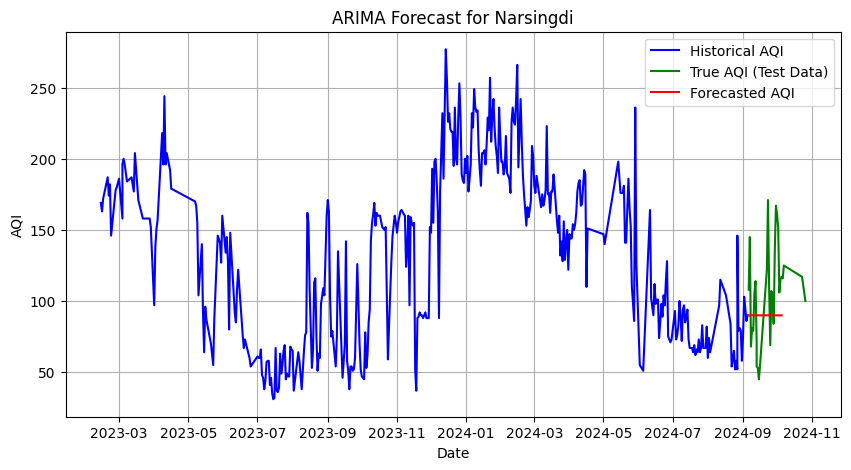


Processing: Dhaka


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

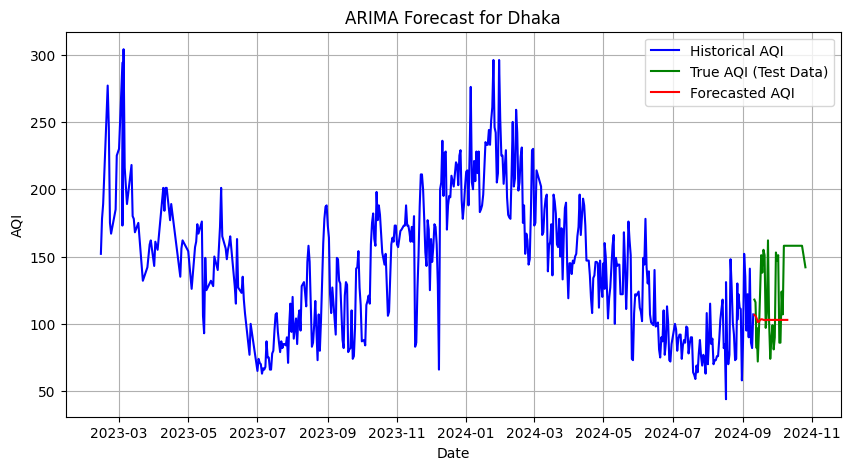


Processing: Chittagong


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

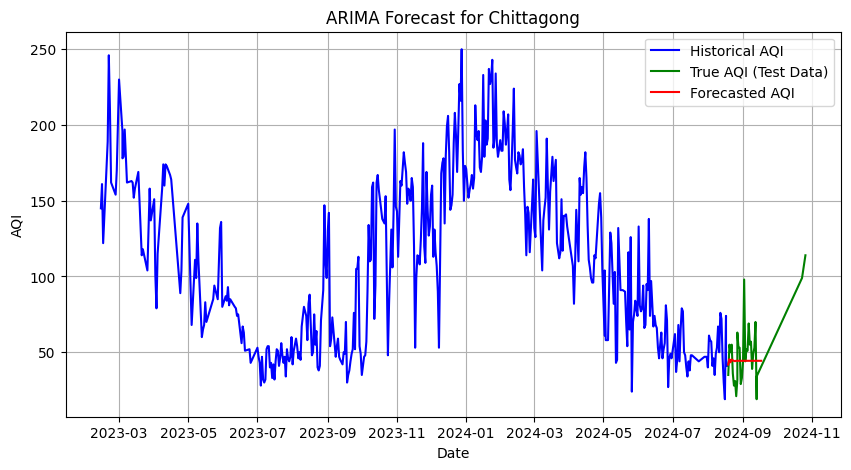


Processing: Gazipur


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

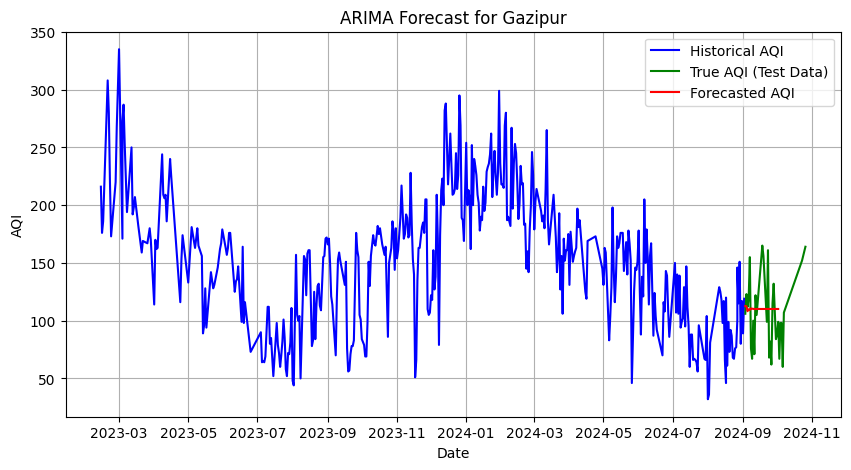


Processing: Narayanganj


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

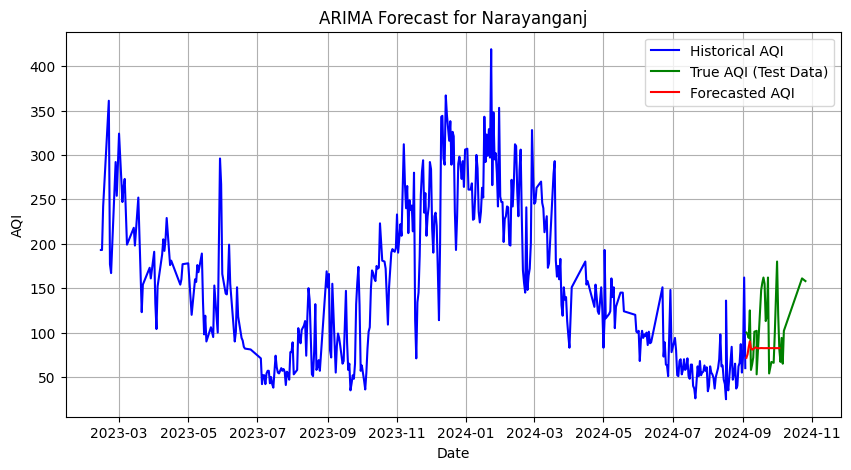


Processing: Cumilla


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

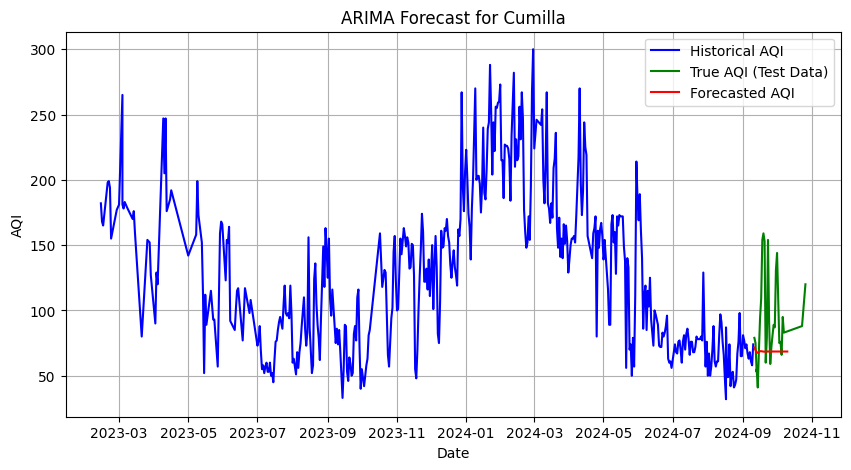


Processing: Rajshahi


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

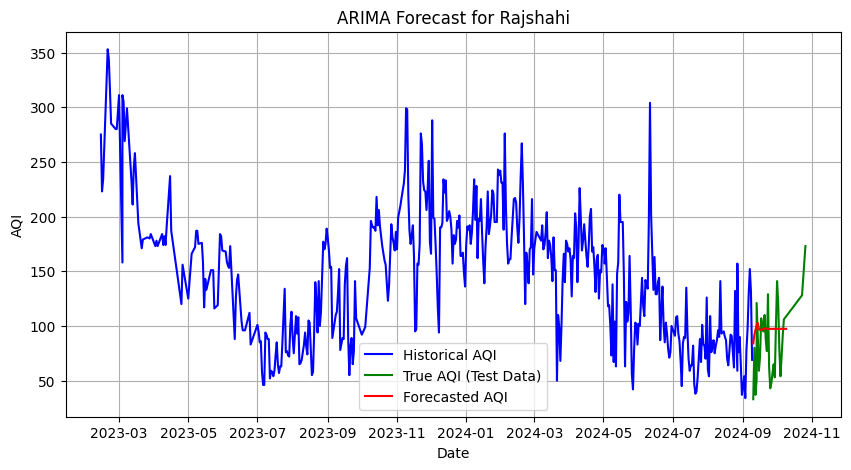


Processing: Rangpur


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

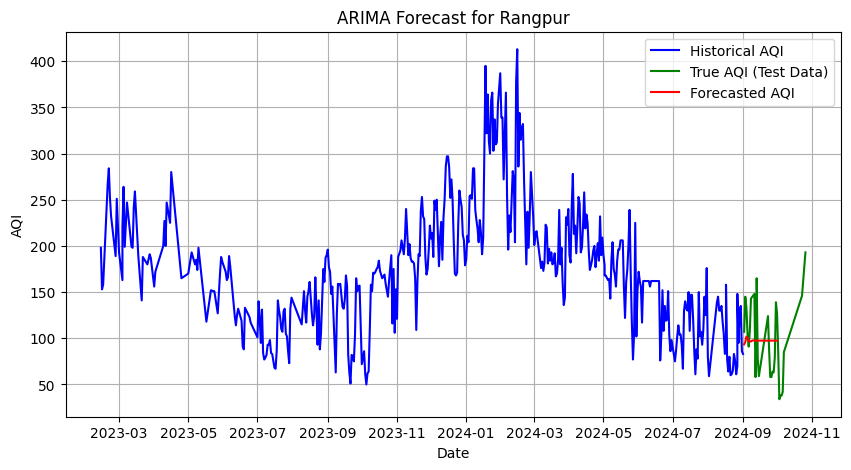


Processing: Mymensingh


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

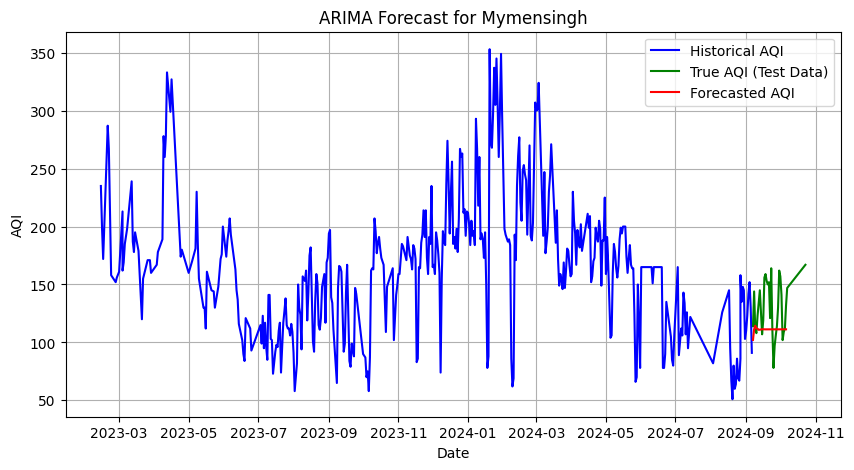


Processing: Khulna


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

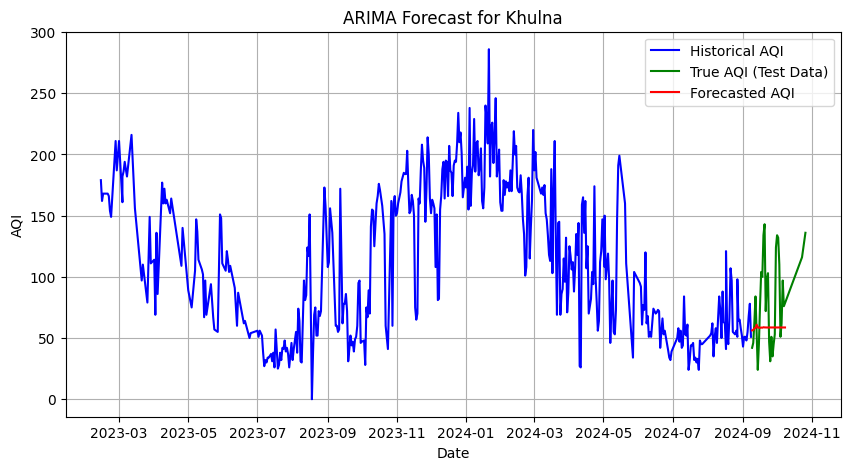


Processing: Barishal


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

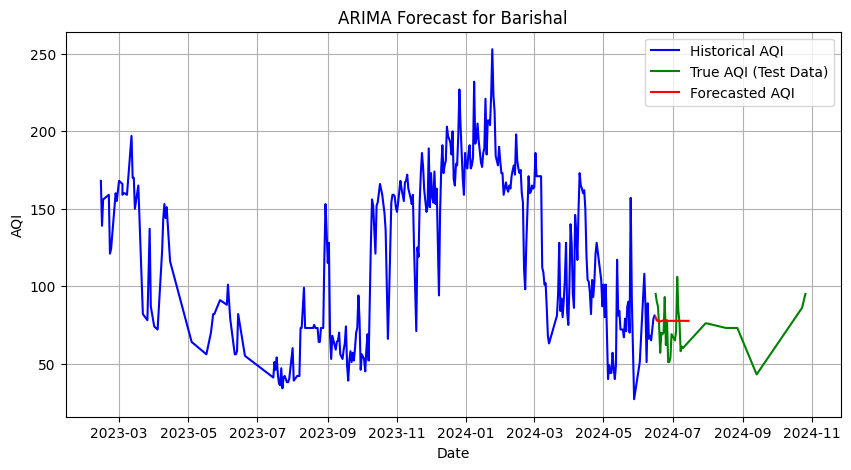


Processing: Savar


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

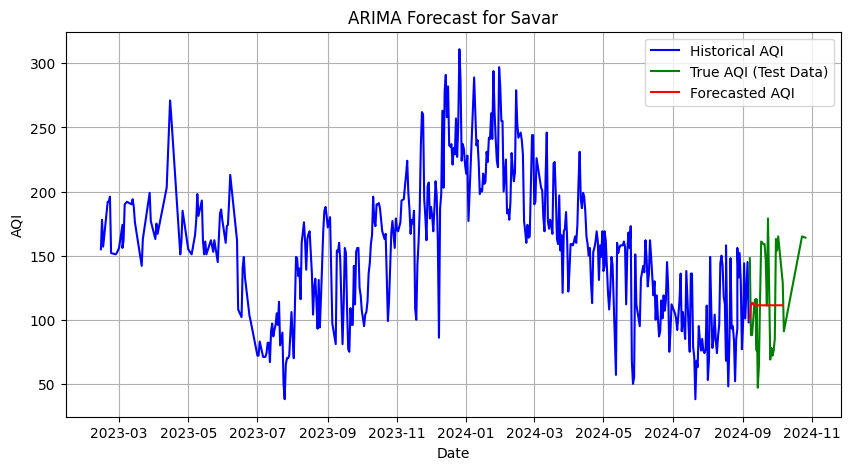


Processing: Sylhet


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

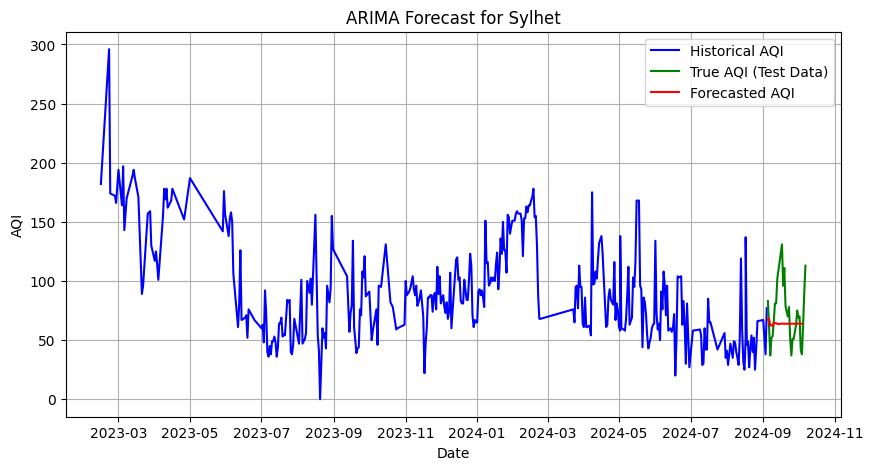


Processing: PM10


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

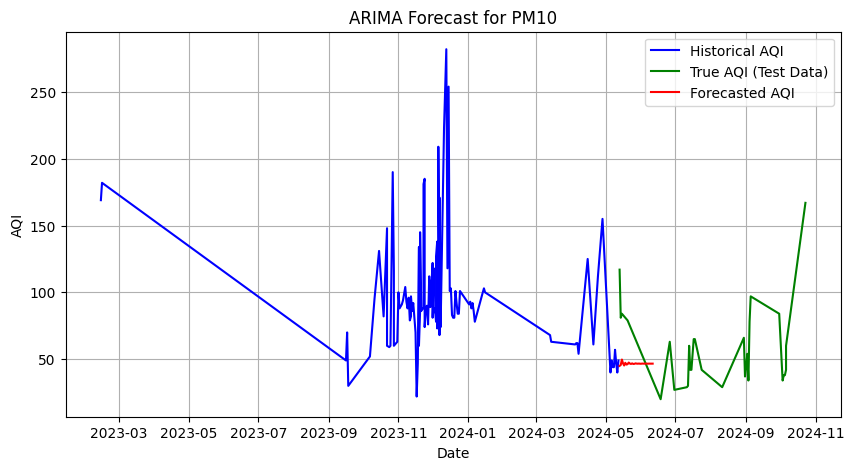


Processing: PM2.5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

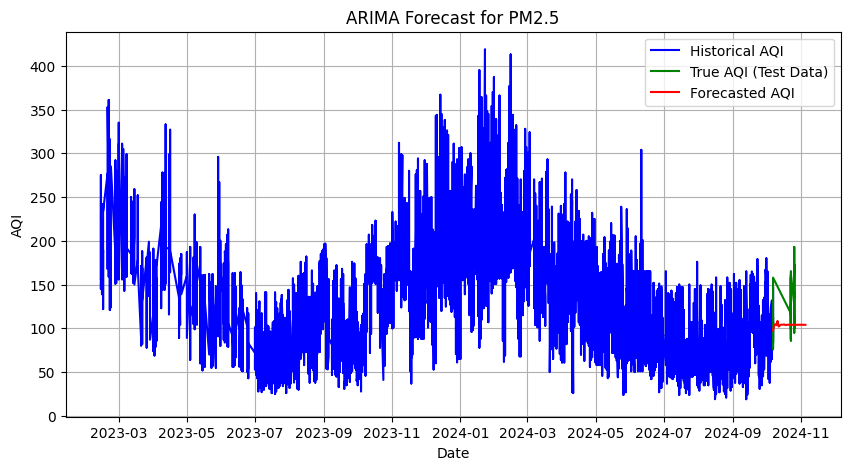


Processing: DNA
Skipping DNA due to insufficient data


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to apply ARIMA and forecast for each group (city or pollutant)
def apply_arima_and_forecast(df, group_by_column, forecast_steps=30):
    unique_groups = df[group_by_column].unique()

    # Loop through each city or pollutant
    for group in unique_groups:
        print(f"\nProcessing: {group}")

        # Filter data for the current group (city or pollutant)
        df_group = df[df[group_by_column] == group].copy()

        # Set 'Date' as the index and sort it
        df_group.set_index('Date', inplace=True)
        df_group = df_group.sort_index()

        # Ensure AQI column is numeric (if not already)
        df_group['AQI'] = pd.to_numeric(df_group['AQI'], errors='coerce')

        # Drop rows with missing AQI values
        df_group = df_group.dropna(subset=['AQI'])

        # Check if the group has enough data points for ARIMA modeling
        if len(df_group) < 10 + forecast_steps:
            print(f"Skipping {group} due to insufficient data")
            continue

        # Split the data into training and test sets
        train = df_group.iloc[:-forecast_steps]
        test = df_group.iloc[-forecast_steps:]

        # Apply ARIMA model (use a simple (5, 1, 0) order, can be tuned)
        model = ARIMA(train['AQI'], order=(5, 1, 0))
        model_fit = model.fit()

        # Forecast the next 'forecast_steps' days
        forecast = model_fit.forecast(steps=forecast_steps)

        # Create a date range for the forecast
        forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

        # Plot the historical AQI, the forecasted AQI, and the true values
        plt.figure(figsize=(10, 5))
        plt.plot(train.index, train['AQI'], label='Historical AQI', color='blue')
        plt.plot(test.index, test['AQI'], label='True AQI (Test Data)', color='green')
        plt.plot(forecast_index, forecast, label='Forecasted AQI', color='red')
        plt.title(f'ARIMA Forecast for {group}')
        plt.xlabel('Date')
        plt.ylabel('AQI')
        plt.legend()
        plt.grid(True)
        plt.show()


# Forecast AQI separately for each city
apply_arima_and_forecast(df, group_by_column='City', forecast_steps=30)

# forecast AQI separately for each pollutant (PM2.5, PM10, etc.)
apply_arima_and_forecast(df, group_by_column='Responsible Pollutant', forecast_steps=30)
